# Import general classes

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import os
import sys
import pylab
import matplotlib.pyplot as plt

In [13]:
from DLITE.cell_describe import node, edge, cell, colony
from DLITE.ManualTracingMultiple import ManualTracingMultiple
from DLITE.ManualTracing import ManualTracing
from DLITE.SurfaceEvolver import SurfaceEvolver
from DLITE.PlottingFunctions import PlottingFunctions

In [17]:
os.chdir('C:\\Users\\Jon\\Documents\\Master Biofísica\\TFM\\CÓDIGO\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DEF\\')
timepoints = [int(i) for i in np.linspace(0, 25, 26)]

In [18]:
print(timepoints)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [19]:
ManualTracingMultipleInstance = ManualTracingMultiple(timepoints, name_first = 'P-T',
                                                           name_last = '.txt', type='prueba')
print(ManualTracingMultipleInstance)

In [ ]:
import time
import threading

def run_process(timepoint, success_flag, error_flag):
    try:
        ManualTracingMultipleInstance = ManualTracingMultiple(timepoint, name_first='P-T',
                                                               name_last='.txt', type='prueba')
        colonies = ManualTracingMultipleInstance.main_computation_based_on_prev(timepoint, colonies=None, index=None,
                                                                                 old_dictionary=None, solver='DLITE', maxiter=60 * 1000)
        success_flag.set()
    except ValueError as e:
        if "shape mismatch" in str(e):
            error_flag.set()

def worker(timepoint, valid_timepoints):
    success_flag = threading.Event()
    error_flag = threading.Event()
    
    try:
        t = threading.Thread(target=run_process, args=(timepoint, success_flag, error_flag))
        t.start()
        t.join(30)  # Espera 60 segundos antes de continuar

        if not t.is_alive():
            if success_flag.is_set():
                valid_timepoints.append(timepoint)
            elif error_flag.is_set():
                timepoints.remove(timepoint)
        else:
            if not error_flag.is_set():
                valid_timepoints.append(timepoint)
    except Exception as e:
        print(f"Error en timepoint {timepoint}: {e}")

timepoints = [[i] for i in range(12, 15)]
valid_timepoints = []

for timepoint in timepoints:
    worker(timepoint, valid_timepoints)

print("Timepoints válidos:", valid_timepoints)

File 12 used a Cutoff value ------> 2
node a = node b, possible topological change
node a = node b, possible topological change
node a = node b, possible topological change
guess tension is [0.44, 0.02, 0.61, 0.57, 0.31, 0.58, 0.91, 0.32, 0.43, 0.95, 0.12, 0.7, 0.77, 0.3, 0.64, 0.69, 0.9, 0.63, 0.05, 0.34, 0.58, 0.79, 0.4, 0.29, 0.03, 0.31, 0.1, 0.94, 0.01, 0.43, 0.1, 0.28, 0.59, 0.98, 0.79, 0.87, 0.25, 0.36, 0.35, 0.75, 0.69, 0.12, 0.3, 0.36, 0.72, 0.21, 0.25, 0.21, 0.82, 0.17, 0.7, 0.25, 1.0, 0.77, 0.05, 0.32, 0.13, 0.45, 0.34, 0.07, 0.9, 0.93, 0.5, 0.8, 0.02, 0.11, 0.7, 0.24, 0.74, 0.85, 0.98, 0.7, 0.57, 0.54, 0.66, 0.87, 0.56, 0.96, 0.42, 0.44, 0.66, 0.19, 0.83, 0.92, 0.98, 0.03, 0.47, 0.75, 0.38, 0.77, 0.45, 0.09, 0.97, 0.19, 0.47, 0.1, 0.19, 0.11, 0.51, 0.91, 0.74, 0.74, 0.29, 0.54, 0.73, 0.86, 0.23, 0.73, 0.55, 0.96, 0.56, 0.42, 0.92, 0.91, 0.55, 0.5, 0.74, 0.15, 0.31, 0.62, 0.72, 0.8, 0.1, 0.04, 0.26, 0.73, 0.33, 0.19, 0.09, 0.85, 0.84, 0.16, 0.6, 0.77, 0.16, 0.29, 0.45, 0.02, 

# Computation

Given timepoints and an instance of the ManualTracingMultiple class, we can compute dynamic cell-cell forces and store it in a dictionary named colonies as follows

In [44]:
#ZASP ERROR EN FILE 13, 22, 44-46, hasta el 85

In [109]:
timepoints= list(range(44,86))
eliminar = [13, 22, 44,45,46]

for num in eliminar:
    if num in timepoints:
        timepoints.remove(num)
print(timepoints)

[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]


In [106]:
timepoints= [22]

In [32]:
colonies = ManualTracingMultipleInstance.main_computation_based_on_prev(timepoints, colonies = None, index = None, 
                                          old_dictionary = None, solver = 'DLITE', maxiter = 60*1000)

File 0 used a Cutoff value ------> 2
node a = node b, possible topological change
node a = node b, possible topological change
node a = node b, possible topological change
node a = node b, possible topological change
node a = node b, possible topological change
guess tension is [0.53, 0.93, 0.41, 0.77, 1.01, 0.51, 0.7, 0.75, 0.94, 0.49, 0.98, 0.39, 0.03, 0.59, 0.27, 0.56, 0.15, 0.05, 0.58, 0.04, 0.58, 0.16, 0.54, 0.1, 0.13, 0.51, 0.16, 0.58, 0.72, 0.9, 0.43, 0.91, 1.0, 0.43, 0.8, 0.25, 0.24, 0.22, 0.7, 0.32, 0.0, 0.74, 0.85, 0.87, 0.99, 0.67, 0.96, 0.33, 0.51, 0.52, 0.91, 0.63, 0.63, 0.98, 0.05, 0.58, 0.08, 0.0, 0.32, 0.09, 0.77, 0.92, 0.61, 0.65, 0.8, 0.87, 0.94, 0.66, 0.31, 0.5, 0.73, 0.8, 0.15, 0.64, 0.76, 0.79, 0.06, 0.54, 0.16, 0.73, 0.55, 0.45, 0.61, 0.46, 0.19, 0.43, 0.89, 0.93, 0.08, 0.25, 0.6, 0.1, 0.46, 0.87, 0.34, 0.88, 0.69, 0.39, 0.22, 0.31, 0.41, 0.73, 1.01, 0.86, 0.24, 0.42, 0.6, 0.44, 0.57, 1.01, 0.5, 0.29, 0.49, 0.24, 0.58, 0.21, 0.58, 0.69, 0.9, 0.15, 0.23, 0.1, 0.58,

Function value 0.34664593739389327
Solution [ 0.05978809  0.05820129  0.07010925  0.045667    0.05815179  0.08328326
  0.04156228 -0.00191242  0.0032285   0.03150287  0.02819458  0.00026885
 -0.00600699 -0.00968019 -0.01723945 -0.02098713 -0.03072186 -0.04129196
 -0.0498841  -0.04342932 -0.03733516 -0.0294236  -0.04742215 -0.05474482
 -0.04046707 -0.05802351 -0.0145215  -0.02003872 -0.02998569 -0.01525039
  0.06433003 -0.06928054 -0.06335819 -0.0535229   0.01400666 -0.0167934
  0.01971948  0.05818114  0.03674874  0.01657094  0.00506348 -0.010839
  0.01555111  0.01205916  0.01674151  0.01097892  0.0147722   0.01591858
  0.02060378  0.004117    0.00914031  0.02262741  0.00488046  0.01763715
  0.00552035  0.06815926  0.05970848  0.08134381 -0.00120575  0.0937552
  0.07145048 -0.04664664 -0.04011774 -0.03697591 -0.00754626 -0.02362805
 -0.00937665 -0.01909866 -0.04283528 -0.03669621 -0.02799703 -0.02783077
 -0.02827263 -0.02420415 -0.00182874 -0.03451563  0.00461055 -0.03499555
 -0.0242825

Function value 57.96413701287992
Solution [3.19685352e-01 3.06498603e-01 0.00000000e+00 3.13814236e-02
 1.37745035e-01 1.58452974e-01 1.49576025e-01 4.44026351e-01
 3.14717746e-01 2.57963692e-01 2.14199398e-01 2.91934304e-01
 3.25787665e-01 4.35465282e-01 3.66462548e-01 5.28647412e-02
 3.80417751e-02 2.84708577e-01 2.24814323e-01 1.61045178e-01
 6.14032337e-04 2.58256830e-01 4.65919043e-01 2.36297198e-01
 5.36527041e-01 2.48665355e-01 2.53798593e-01 2.84053034e-01
 2.40187310e-01 1.86979464e-02 1.54581957e-01 1.76459455e-01
 2.38979089e-01 2.50775197e-02 1.76727778e-02 2.00255425e-01
 3.65297562e-01 3.35845165e-01 2.35367404e-01 1.96898286e-01
 3.33618198e-01 3.95245610e-02 1.40295550e-01 6.28879533e-02
 1.36194640e-01 1.69876319e-02 1.13497862e-02 2.57851985e-02
 4.64955553e-01 1.31337090e-01 1.75516349e-01 3.69255685e-01
 2.43139358e-01 1.29612412e-01 8.40365059e-03 2.83335721e-01
 2.99639195e-01 1.29200929e-01 1.11973603e-01 6.43490276e-02
 1.68400988e-01 1.39147591e-01 4.18618479e-

Function value 0.2802347643052378
Solution [-0.06526899 -0.02011117 -0.14779244 -0.04200304 -0.03561963 -0.03917909
 -0.04092088 -0.03799829 -0.04520797 -0.07019364 -0.09870306 -0.06612945
 -0.04012598 -0.05064368 -0.07606231 -0.08773418 -0.04101035 -0.08530646
 -0.05872277 -0.04115788 -0.07074192 -0.04372896 -0.04680055 -0.04585758
 -0.03723743 -0.03741049 -0.04490169 -0.03934944 -0.04716336 -0.02418905
 -0.0381582  -0.01680709  0.00443214  0.04242219 -0.0118411  -0.02219553
  0.00110906  0.01190186 -0.00165721 -0.0110846   0.00626942  0.01769574
 -0.00366698 -0.00295661 -0.00553978  0.00366272  0.0321497   0.03627889
 -0.00991463  0.00611245  0.00255041  0.01935531 -0.00355429  0.00558618
  0.03101601 -0.0028913  -0.01296005  0.00145378  0.0056385  -0.0013089
 -0.00115704  0.02839765  0.00983902  0.0073851   0.00893492  0.04391879
 -0.00286703 -0.01374135  0.00391567  0.01368718 -0.00319528 -0.00560975
  0.01086531  0.02180591 -0.0004182  -0.00184149  0.0378372   0.00498042
  0.00612

Function value 60.913086860648946
Solution [0.16462168 0.23695532 0.21921103 0.14714108 0.03659932 0.05871729
 0.20904165 0.21495849 0.0655969  0.05167537 0.26009156 0.06918648
 0.07356685 0.22921086 0.24917597 0.08076361 0.0775182  0.24992389
 0.2993018  0.1267988  0.11031699 0.37000471 0.23182861 0.2469514
 0.31532868 0.28682653 0.20603327 0.28050139 0.         0.03407405
 0.37925503 0.28623473 0.17915559 0.11870343 0.21161827 0.23391652
 0.23818696 0.16642222 0.26082109 0.26694743 0.26977856 0.41125075
 0.38072111 0.21991842 0.17222682 0.23690034 0.05476855 0.24577116
 0.13063523 0.13421396 0.1088624  0.05332565 0.21312373 0.18438261
 0.30948455 0.03276013 0.42368346 0.11759616 0.15636547 0.2971829
 0.16057204 0.01582012 0.01965838 0.227325   0.25278788 0.26575358
 0.43751379 0.29985832 0.0200796  0.15914611 0.38243125 0.17201169
 0.29786428 0.21833307 0.13739315 0.09695132 0.31461699 0.23403412
 0.12459013 0.11623627 0.11366171 0.33317074 0.46529629 0.44331477
 0.         0.2286223

Function value 0.12634760988540486
Solution [-0.0226608  -0.00567495 -0.01569231 -0.01590027 -0.01198238 -0.01078867
 -0.0130326  -0.01132746 -0.00550794 -0.01028057 -0.00210758 -0.00902403
 -0.01711678 -0.02045481 -0.00406914 -0.0190401  -0.02429357 -0.006231
 -0.02907925 -0.01665602 -0.02346014 -0.01181482  0.01292848 -0.01282449
 -0.01116951 -0.01261434 -0.01129748 -0.00580274 -0.00508624  0.01200455
 -0.0149399   0.00847395  0.00175483 -0.00488827  0.00756406 -0.01656671
  0.00243649  0.00276285  0.00650255 -0.00193675 -0.00527663 -0.00450214
  0.01678598  0.01631121  0.01616336  0.01595322 -0.00488351  0.00911046
  0.03645671  0.02773407  0.00930195  0.01179506 -0.00125148  0.01685433
 -0.01155377  0.01479703  0.03044029  0.01320226  0.00724534  0.00446158
  0.00569988 -0.00245077  0.01383326  0.03730918  0.04668132  0.01865866
  0.01809276  0.01623921  0.02589793  0.01609837  0.03856145  0.03547626
  0.01435722  0.02280138  0.02860097  0.00836955  0.01269523  0.03092899
  0.04846

Function value 55.70624459708741
Solution [0.11524253 0.2197157  0.18637784 0.32503818 0.34810201 0.27124119
 0.32471716 0.24932358 0.15458873 0.1569768  0.11203936 0.10463708
 0.1691469  0.01958183 0.15027965 0.12741859 0.18279652 0.14807274
 0.23708921 0.20374186 0.39956061 0.2788581  0.27333214 0.0052566
 0.01116337 0.09426392 0.13495466 0.17834324 0.33713321 0.20748096
 0.20811568 0.11739027 0.12303678 0.1448578  0.24041327 0.01276411
 0.21658162 0.09297052 0.16178423 0.20567516 0.15177866 0.03661677
 0.13502251 0.17211341 0.25074581 0.27903142 0.30156098 0.26054495
 0.23664875 0.11487453 0.18464187 0.         0.17113589 0.06160021
 0.27088332 0.21784953 0.21442317 0.26733522 0.24032797 0.24423652
 0.20876509 0.17052786 0.18123601 0.12167387 0.43716656 0.32845193
 0.42405087 0.         0.17617945 0.13411991 0.16389321 0.21660209
 0.22245026 0.05968093 0.2480128  0.27197515 0.1184663  0.21864723
 0.36524878 0.48798655 0.40631694 0.38509816 0.01337614 0.18305627
 0.25803297 0.2059193

guess tension is [0.2, 0.2, 0.2, 0.2, 0.3250381813741075, 0.39956060804496135, 0.24932357846497352, 0.2, 0.2, 0.2, 0.2, 0.11524252897447713, 0.2, 0.2, 0.11203935500233995, 0.10463708019092023, 0.16914690007840286, 0.3481020089635169, 0.2788580951450275, 0.27333213799025297, 0.2, 0.2, 0.2, 0.2, 0.18279652058493134, 0.019581833370550743, 0.1502796512509407, 0.12741858981196016, 0.2, 0.2197156979515137, 0.18637784442433653, 0.2, 0.2, 0.2, 0.1480727370572285, 0.23708920718621368, 0.005256602749855663, 0.01116337223316713, 0.2, 0.2, 0.2, 0.2, 0.20811567511262888, 0.1173902732219216, 0.12303677997701734, 0.20748095670491726, 0.14485780331680637, 0.24041326867514978, 0.01276410653711754, 0.17834323725008433, 0.337133213049473, 0.2, 0.09426392314116083, 0.21442316937746966, 0.1617842317403847, 0.2056751592329917, 0.15177865626426718, 0.2165816172156179, 0.0929705234201319, 0.2, 0.13502251038796878, 0.03661677290393214, 0.17211341449953502, 0.25074580814429775, 0.2790314232042856, 0.30156098111

Function value 54.60204097181726
Solution [0.16383014 0.11182605 0.08321314 0.11433287 0.18890794 0.32011966
 0.15297562 0.14729058 0.00568719 0.23014843 0.11708795 0.20836032
 0.24620798 0.19413923 0.21064666 0.18132247 0.20124461 0.26142648
 0.2257121  0.29371769 0.15869134 0.14023291 0.11812272 0.27538336
 0.21666358 0.09893385 0.20833534 0.17786605 0.0749613  0.17697541
 0.16440016 0.07496197 0.04106018 0.18373108 0.08777253 0.20843785
 0.13887043 0.16057407 0.05233703 0.20016601 0.08404178 0.2697231
 0.28065936 0.11536995 0.09331623 0.15071944 0.11700268 0.19127865
 0.16759493 0.15149733 0.16181419 0.07846653 0.16113471 0.16630612
 0.05743597 0.05632487 0.         0.25084204 0.13567545 0.34205237
 0.04100891 0.03255971 0.05586788 0.21527567 0.16079399 0.21908367
 0.24711303 0.23603137 0.1669752  0.01537319 0.03078363 0.20359773
 0.23771606 0.03795128 0.03201924 0.33990006 0.32377704 0.01077575
 0.24364362 0.09390454 0.1541124  0.25974625 0.28059322 0.35262402
 0.14812014 0.3535470

Function value 0.08209927645932732
Solution [-2.61820866e-03  9.82315039e-05 -9.58606494e-03 -7.25435822e-03
 -4.41064103e-03 -1.98874397e-02 -1.32989391e-02 -1.24922847e-03
 -2.93266684e-03  3.45404015e-04  1.91316053e-02 -1.03957628e-02
 -1.04395224e-03 -5.14122838e-03 -8.09073986e-03 -3.73829481e-03
  4.33393519e-04 -1.13757611e-02 -9.27713917e-04 -6.60033902e-03
  4.26354039e-03 -1.68467987e-02  2.02737892e-05 -8.88561802e-03
 -8.02783564e-03  1.13199230e-03  3.71332081e-03  1.51413816e-02
 -8.63535065e-03  3.30069738e-03 -5.40981746e-03  4.46645833e-03
  1.16067411e-02  7.39557662e-03  2.18166727e-02 -6.86487568e-03
 -7.83232966e-03  1.65757207e-02  1.42111341e-02 -1.75182993e-03
 -4.42078000e-03  2.25220221e-02  1.36342110e-02  2.09156878e-02
 -3.34838340e-03 -3.55819916e-03 -9.45895811e-04  3.07215811e-02
  1.47108555e-02  1.93448243e-02  4.33387533e-02  2.09674147e-02
 -4.02640193e-03  1.79412341e-02  1.65403415e-02 -5.45880628e-03
  3.60386990e-02  1.24514051e-02  2.83219221e-

Function value 48.35760849278978
Solution [0.14468098 0.25131475 0.22621784 0.17968658 0.10694342 0.14795746
 0.2264678  0.04148035 0.16523265 0.15069742 0.05451742 0.1070809
 0.18632872 0.13091032 0.22959037 0.14804316 0.1541698  0.22667153
 0.21688569 0.13355618 0.25143554 0.24473781 0.16231865 0.15178255
 0.13970039 0.14960328 0.05108547 0.         0.10340059 0.03669209
 0.0280373  0.09505164 0.15325035 0.14773559 0.17774963 0.015961
 0.18340368 0.03183493 0.28050958 0.08813044 0.12604757 0.03107411
 0.1668289  0.04729116 0.08651459 0.1010843  0.06939382 0.17271936
 0.1151849  0.1747646  0.05725225 0.09302858 0.13538852 0.14154781
 0.18069873 0.33028165 0.12330759 0.12058737 0.21640105 0.26360448
 0.06964432 0.11185712 0.15277404 0.36142992 0.16033679 0.20770991
 0.20544399 0.15280975 0.         0.12625466 0.12752675 0.08438928
 0.212403   0.16275407 0.23098094 0.16266012 0.17876032 0.42160319
 0.2554524  0.40300843 0.08656493 0.07549949 0.15295706 0.11474364
 0.14461586 0.15826475 

Function value 0.05334356017236056
Solution [-1.05349911e-02 -1.10036387e-02  2.17215170e-03 -1.22170932e-02
 -8.03307586e-03 -4.10073853e-03 -1.63185843e-02 -1.72325163e-02
 -1.81559556e-02 -7.05050033e-04  9.94962849e-03 -1.56142656e-02
 -8.66551566e-03 -1.62712119e-02 -1.65271183e-02 -5.51234864e-03
 -1.78142482e-03 -2.56345748e-03 -1.45703060e-02 -1.30410309e-02
 -4.32174091e-03 -1.15943569e-05 -1.09847012e-02  6.49185816e-04
 -7.18589432e-05  4.50356756e-04  1.91280712e-02 -2.78958108e-03
 -8.82345002e-03 -7.84807524e-03  2.19104925e-02 -4.03266026e-04
  6.52295916e-03  3.39458764e-03  1.76939191e-02 -5.26842324e-03
  4.59841712e-03  8.04829643e-03  4.99019228e-03  9.18328633e-03
  7.08172224e-03  6.93460214e-03  6.91245044e-03  6.99789364e-03
  7.56423129e-03  2.77451238e-03  1.08549533e-02  1.46300178e-02
  1.66399327e-02  2.12324120e-02  1.29940122e-02  7.44152673e-03
  3.68659477e-03  8.19045250e-03  2.15486439e-02  1.84162854e-02
  2.57750553e-02  1.72819082e-02  6.52262851e-

Function value 51.2801855809725
Solution [1.04756402e-01 2.41747164e-01 1.20733571e-01 9.92607119e-02
 2.29040243e-01 2.91742057e-01 1.94301890e-01 8.51678847e-02
 1.64071374e-01 1.59032419e-01 8.64158304e-02 2.62853596e-01
 1.71418729e-01 2.12983327e-01 1.59213703e-01 2.01134874e-01
 1.16716451e-01 8.24860350e-02 1.22247155e-01 6.15512171e-02
 1.91128523e-01 1.04854396e-01 8.27679862e-03 1.65569163e-01
 1.75560564e-01 1.67632268e-01 1.90315181e-01 8.95642234e-02
 6.69441550e-02 0.00000000e+00 1.32146340e-01 2.19889038e-01
 1.28018221e-01 1.62720158e-01 2.01813891e-01 3.58258007e-02
 7.18292225e-02 6.87505512e-02 6.49670084e-02 6.31722944e-02
 2.17581509e-01 1.43651877e-01 1.26908646e-01 1.59979243e-01
 0.00000000e+00 6.63110674e-02 6.95322364e-02 1.31203926e-01
 1.82433109e-01 4.47500758e-02 2.78104417e-01 6.69977910e-02
 1.38395711e-01 1.56900354e-01 1.33281498e-01 1.57616027e-01
 1.87200673e-01 1.87714243e-01 1.48117319e-01 1.88668457e-01
 1.22962473e-01 1.90193105e-01 2.28755054e-0

Function value 0.06986644848369833
Solution [-0.0385994  -0.02590575 -0.02695984 -0.03322567 -0.0207551  -0.02870007
 -0.03626042 -0.03765957 -0.02868718 -0.02723727 -0.03714711 -0.03715646
 -0.02577442 -0.02910031 -0.03773578 -0.03552688 -0.03318806 -0.03823424
 -0.02754638 -0.02626726 -0.02485101 -0.03396216 -0.02408048 -0.02997355
 -0.0255784  -0.02372446 -0.02496492 -0.02431185 -0.01067196 -0.01962951
 -0.01374305 -0.02546132 -0.01220332 -0.0082362   0.00736399 -0.04298417
 -0.01601124  0.00086183  0.00045409  0.02243456 -0.0077219  -0.00904914
 -0.00232639 -0.00587028  0.0030057   0.00464262  0.00628747  0.02389083
  0.01054645  0.02102045  0.00477632 -0.0001932   0.00518976  0.0196007
  0.02504854  0.01113182  0.01317357  0.01139164  0.00735722  0.00587688
  0.01282214  0.00990035  0.00337346  0.01636992  0.03212101  0.01499061
  0.0153446   0.00991459  0.01254284  0.01212562  0.01608481  0.01533967
  0.0302202   0.01248471  0.02525031  0.0073018   0.00932956  0.01648291
  0.0451

Function value 46.306809122677905
Solution [0.01402085 0.05610203 0.14728618 0.23448715 0.19855423 0.16920179
 0.19255575 0.15400214 0.08615992 0.05665995 0.         0.01492357
 0.         0.13857595 0.         0.10058032 0.19902875 0.14766053
 0.16420773 0.11453099 0.17553288 0.19864869 0.05991505 0.12413943
 0.01551678 0.15525272 0.11537704 0.09425466 0.07568485 0.13944787
 0.06821846 0.11743627 0.09211454 0.10667971 0.1212783  0.0597559
 0.01449166 0.08702957 0.09635928 0.1123595  0.05684047 0.20189971
 0.1646866  0.16379632 0.12544747 0.22742988 0.0889034  0.08137738
 0.07673008 0.11343817 0.09264204 0.13194204 0.1200111  0.19868825
 0.23142858 0.18175918 0.22867074 0.14555338 0.21424925 0.15100346
 0.11909995 0.13320743 0.13203235 0.0044831  0.19746417 0.05396223
 0.19092528 0.30986143 0.301146   0.38281019 0.27240004 0.18019317
 0.02560358 0.09570873 0.10910254 0.05692629 0.12611083 0.23879761
 0.12116784 0.21296273 0.16603618 0.19912699 0.16955966 0.28422362
 0.3131488  0.313821

Function value 0.06708987190283894
Solution [-8.91862607e-03 -6.70651274e-03 -1.34954881e-02  4.74883616e-03
 -1.62441083e-03 -4.24422273e-04 -1.25436388e-02 -1.33029994e-02
 -1.50318644e-02 -6.57989954e-03 -6.75621783e-03  3.13573988e-03
 -1.59302554e-02 -5.04178616e-03 -4.57175597e-03 -6.84153227e-03
 -1.22309127e-02 -7.04820642e-03 -2.38819261e-03 -1.24203422e-02
 -2.65433922e-03 -5.28663116e-03  2.54786901e-03  1.26560471e-02
  8.51826730e-03 -2.88389475e-03  2.65619305e-03  1.36886076e-02
  1.19005189e-02  5.53004855e-03  1.02435886e-02  2.61490198e-02
 -4.35725892e-03  4.04220041e-03  9.75838978e-03  1.12113110e-02
  6.83899031e-03  1.70057286e-03  1.29066237e-02  5.68540212e-03
  2.48288958e-03  4.00665775e-03  1.46444905e-02  9.91352853e-04
  3.36118866e-03  1.38137187e-02  2.28965040e-02 -1.37309505e-03
  2.44342782e-03 -1.27373832e-03  9.10877453e-03  2.39743802e-02
  1.38021519e-02  1.85341675e-02  1.38041850e-04  6.56318167e-03
  5.13344458e-03  8.93445478e-04  6.42682080e-

Function value 48.863715126928525
Solution [0.10400858 0.1345868  0.14758628 0.12998959 0.05555293 0.13732882
 0.21724561 0.08403195 0.11157908 0.13293419 0.23283615 0.06024443
 0.16258569 0.11806559 0.08742384 0.04225688 0.17805392 0.19716065
 0.15830491 0.16193108 0.06147737 0.10921229 0.22751247 0.21027309
 0.14173564 0.12758695 0.15752079 0.15011379 0.1585622  0.18245991
 0.11067477 0.10114832 0.         0.0596207  0.13087063 0.01364686
 0.08528338 0.10830675 0.08947053 0.09969007 0.09090673 0.17163324
 0.15329292 0.24544567 0.12166796 0.15964345 0.08061189 0.06669075
 0.08406043 0.1737732  0.0602079  0.04069336 0.17230739 0.21294876
 0.18282402 0.22219757 0.13422404 0.13837115 0.25158575 0.17862526
 0.11207998 0.11522782 0.14824976 0.11434775 0.24958311 0.10836295
 0.24512069 0.31435121 0.28026454 0.41832178 0.32476944 0.18315053
 0.04109161 0.06887141 0.05938515 0.00651266 0.06203314 0.21004509
 0.11115596 0.18967308 0.13754997 0.17624563 0.24376709 0.23606559
 0.25253797 0.29917

Function value 0.06181499713360161
Solution [-0.02081289 -0.02218221 -0.01740632 -0.02554732 -0.0145148  -0.01380846
 -0.00511137 -0.01054511 -0.01199111 -0.00818709 -0.02667712 -0.02143954
 -0.02811277 -0.01097552 -0.02012312 -0.01384189 -0.01130789 -0.02284199
 -0.01189702 -0.00589668 -0.01607129 -0.00894929 -0.00207014  0.0065331
 -0.01173717 -0.00879613 -0.0106491  -0.00545068 -0.02081712  0.00358087
  0.00308714  0.03409271 -0.02659555 -0.01587291  0.00519268  0.00456145
  0.00017323 -0.00811329 -0.01090649 -0.00241385 -0.01004018 -0.0084692
  0.00066385  0.00228379  0.01010039  0.01623833  0.00091759 -0.00709154
 -0.00470903  0.00628259  0.01577952  0.01049903  0.0082942   0.00124775
  0.01598712  0.0198214   0.00446542  0.00708461  0.00848573  0.00446984
  0.02150021  0.02748517  0.00854144  0.00828678  0.00795258 -0.00350842
  0.01622266 -0.00172643  0.0084574   0.00904666  0.0164634   0.0022243
  0.01149574  0.009597    0.01776106  0.02426613  0.01930852  0.01627397
  0.007124

Function value 49.26172409528693
Solution [1.13679510e-01 1.47034620e-01 1.92186375e-01 4.77106421e-02
 1.00867021e-01 9.42209651e-02 6.52014826e-02 2.10606358e-01
 1.93316742e-01 1.83080313e-01 1.53238873e-01 2.21146590e-01
 2.01191166e-01 1.48486251e-01 1.77096443e-01 1.20169740e-01
 1.48591601e-01 4.47653065e-02 2.42196797e-02 1.39870026e-01
 3.10557239e-02 3.10557256e-02 9.25843602e-02 1.61733540e-01
 2.01098704e-01 2.00359888e-01 1.41064884e-01 3.79724638e-02
 4.15661604e-02 1.17857739e-02 6.19627868e-02 1.08631971e-01
 8.79329281e-03 8.01593547e-02 4.39241407e-02 2.07265179e-01
 1.26417569e-01 1.83903013e-01 1.59596334e-01 1.11365981e-01
 8.54221065e-02 1.07690288e-01 4.81345507e-02 9.87941443e-02
 7.67807754e-02 1.75485353e-01 2.95210553e-02 4.63171854e-02
 5.90328478e-02 7.84691353e-02 1.00168977e-01 1.09870865e-01
 1.79019758e-01 4.29352055e-02 1.36407490e-01 1.14346072e-01
 8.01464898e-02 6.70813906e-02 1.32464136e-01 1.52074943e-01
 1.11232816e-01 9.51417570e-02 1.65021155e-

Function value 0.05603336559294452
Solution [ 2.91300893e-02 -5.02805359e-03  1.10861596e-02  2.37447877e-02
  8.92382635e-03  8.38420129e-03 -4.42549460e-03  6.33077146e-03
 -4.77273862e-03 -4.19551750e-03 -1.27843674e-02 -3.50415939e-02
 -9.72575658e-03 -1.30831986e-02 -8.73377072e-03 -9.35034839e-03
 -1.04033590e-02 -1.28518384e-02 -7.60660161e-03 -1.03591926e-02
 -1.12799031e-02 -1.25436473e-02 -8.53876446e-03 -1.14500893e-02
 -1.04484168e-02 -3.36916550e-03 -1.39867097e-03 -5.08130860e-03
 -9.31349278e-03 -3.35895426e-03  5.57816084e-03 -8.30265204e-03
 -1.26694030e-02 -3.43350946e-03 -5.76662310e-04 -4.83900956e-03
  7.32204492e-04 -4.90667685e-03 -4.90450625e-03 -2.23477883e-03
  3.01853705e-04 -7.16013832e-03 -2.88105649e-03 -2.81683738e-03
 -2.34872730e-03  6.44394844e-03  5.01632525e-03 -1.09941287e-03
  1.44600313e-02 -3.44639994e-03  4.03910028e-03 -2.41003915e-04
  2.50419992e-02  1.00704061e-02  9.76882778e-03  1.04771127e-02
  5.34272373e-03  1.08087925e-02  1.79421299e-

Function value 46.29839634985985
Solution [0.14082608 0.17496204 0.19671774 0.13874751 0.1140817  0.12528309
 0.12331666 0.1128344  0.10177614 0.11432889 0.15182454 0.16246565
 0.0842449  0.0963373  0.10432611 0.10764347 0.11818576 0.09234404
 0.1171582  0.12311889 0.05622196 0.09323286 0.13684424 0.0909193
 0.02761499 0.0883238  0.05042946 0.08546992 0.13054296 0.07370742
 0.1442459  0.17746106 0.10706299 0.04610389 0.09500848 0.12606706
 0.07128991 0.11485294 0.10432539 0.09522881 0.14028595 0.14137347
 0.09940941 0.1628887  0.15222969 0.11188245 0.0593153  0.11412368
 0.14218388 0.09397453 0.12813689 0.11837458 0.10853779 0.10455968
 0.1306285  0.36927637 0.10182311 0.21868688 0.26491199 0.25424272
 0.14348083 0.04633939 0.15670646 0.35047395 0.21141893 0.03295096
 0.07296846 0.14818198 0.07200207 0.32087818 0.07248237 0.29599113
 0.18973697 0.15961571 0.14202285 0.17903917 0.15039304 0.34449281
 0.28340721 0.32974213 0.32746467 0.0063621  0.01527124 0.07357475
 0.26725085 0.1175808

guess tension is [0.11283440123355447, 0.10177614493808297, 0.11432889061666827, 0.2, 0.162465647354061, 0.08424490246233914, 0.09633730124732943, 0.10432611303019743, 0.10764346841949546, 0.11818575526137147, 0.09234404074421966, 0.11715819512090599, 0.12311889128659774, 0.05622195593159825, 0.09323285972218823, 0.13684423864336914, 0.09091929959348227, 0.12528308515504882, 0.027614985389905877, 0.08832380474289217, 0.05042946129970102, 0.0854699206644984, 0.14424589783343786, 0.17746106186482588, 0.10706298986721756, 0.1305429612463597, 0.07370742190927179, 0.12606705876780427, 0.046103890233571386, 0.09500848441995914, 0.07128990842964178, 0.114852942611138, 0.10432539136415489, 0.09522881463453875, 0.05931530441520659, 0.11412368072814277, 0.14218388464759807, 0.09397453037216592, 0.14028594954413925, 0.14137347201859302, 0.09940940788265679, 0.16288870089484983, 0.15222969391430777, 0.1118824475268807, 0.2, 0.10853779151153606, 0.12813689012112234, 0.04633939145006927, 0.156706459

Function value 0.05064913123893887
Solution [ 4.62561349e-03  3.61173826e-03  5.67882561e-03  3.99009428e-03
  2.67037158e-03  1.49090692e-02  2.24601553e-02  7.72145900e-03
  1.51338130e-02  8.82903527e-03  1.22202103e-02  1.24871508e-02
  2.07560729e-03  9.39034790e-03  1.53413460e-02  1.65161844e-02
  7.64938120e-03  1.48451914e-02  1.91894188e-02 -3.08788025e-03
  2.44229936e-02  1.36092295e-02  1.56543827e-02  1.33659593e-02
  5.78864036e-03  1.12156866e-02  4.52774958e-03  1.34173795e-02
  9.69835780e-04  1.17858265e-02  8.06767463e-03  7.59986531e-03
  2.23465059e-03  9.81933391e-03  1.32544475e-02  9.20081232e-03
  6.97667991e-03  9.06016098e-03 -6.26241363e-03  7.78318276e-03
  7.02558640e-03  1.77492331e-02  1.04537860e-02  5.34434169e-03
  3.58326746e-02  7.31425807e-03  9.35645667e-03  9.74967597e-03
  1.74865789e-02  1.43555743e-02  1.01931558e-02  2.76795054e-03
  9.60977064e-03  1.30141946e-02  9.31654391e-03 -2.33117500e-04
  1.41955223e-02  2.86936365e-03  3.44309537e-

Function value 43.42628288614092
Solution [1.62347133e-01 1.41208637e-01 1.83269941e-01 1.71036452e-01
 1.42016838e-01 1.20767162e-01 2.23920846e-01 1.39539168e-01
 1.35521221e-01 1.29694980e-01 7.27296434e-02 1.03220741e-02
 1.10969923e-01 1.40069628e-01 1.35976051e-01 1.80392222e-01
 5.54748782e-02 6.23107005e-02 6.63359228e-02 5.93527571e-02
 0.00000000e+00 4.89458668e-02 4.53278871e-02 1.75726339e-01
 1.25011135e-01 1.72482983e-01 1.57697972e-01 1.84560354e-01
 3.11756665e-02 8.05129785e-02 1.22246125e-01 7.33705940e-02
 1.21024927e-01 8.87155345e-02 1.83254087e-01 1.87274653e-01
 2.23133922e-01 6.29565560e-02 8.94477153e-02 8.65492098e-02
 1.75529004e-01 4.55171344e-02 6.62512200e-02 1.24985957e-01
 9.47782386e-02 3.14446147e-01 4.39519381e-02 2.55916629e-01
 2.22557832e-01 1.44695090e-01 1.52446369e-01 2.76326442e-02
 2.17784850e-02 9.62831886e-02 1.14682753e-01 3.18213054e-01
 1.97100223e-01 1.89762380e-01 2.56200601e-01 6.17795151e-02
 2.76868686e-01 2.07498131e-01 2.65058325e-

Function value 0.06802023260078902
Solution [-6.27748517e-03  4.37097129e-03 -4.52042141e-03  1.63627787e-03
 -3.35563034e-03 -6.43619743e-03 -7.15394892e-03 -4.57891099e-04
 -1.16717206e-02 -1.30915143e-03 -3.90644567e-03 -7.69533083e-03
 -3.65296024e-03  5.79653130e-04 -9.34738838e-03 -1.45288504e-03
  2.26882280e-03 -3.39656754e-03 -1.14277309e-02 -3.14965908e-03
  2.03143461e-02  4.47064861e-04 -6.45504123e-03 -1.05001328e-02
 -2.93725555e-03  7.86588844e-03  1.82560541e-03 -5.15804264e-03
 -4.51613724e-03 -9.44475575e-03 -7.74988157e-03 -6.68160500e-04
 -1.08536096e-02 -6.64575210e-03 -6.05650452e-03 -7.34247502e-03
 -1.61376365e-03 -3.41743930e-03 -6.19805112e-04  1.12996253e-02
  2.60023115e-03 -4.42184422e-04 -8.09262228e-03 -3.53643325e-03
  7.23603895e-03  5.37263314e-03  1.10205230e-02  1.04668429e-02
  3.73599794e-03  1.28975583e-02 -9.88513529e-05  3.08570871e-03
 -2.18481704e-03  3.44284527e-03  7.18982405e-03  2.28811031e-03
  8.48989651e-03  1.19683292e-02 -6.35603808e-

Function value 42.189681563915364
Solution [1.00788224e-01 5.28817232e-02 3.32280593e-02 7.95696280e-02
 1.21846924e-01 0.00000000e+00 8.77905492e-02 1.62623735e-01
 6.83803694e-02 7.36648008e-02 6.65269926e-02 6.65724329e-02
 1.23993989e-01 1.62103031e-01 1.33914563e-01 1.30394475e-01
 1.91747593e-01 1.28818157e-01 1.63144511e-01 1.28400601e-01
 7.97843678e-02 1.37983210e-01 2.33687991e-01 2.36403148e-01
 9.57479162e-02 1.48212474e-01 1.39867075e-01 1.69375835e-01
 9.42733888e-02 2.43572888e-01 2.01971045e-01 1.46776243e-01
 1.25790391e-01 1.02198379e-01 1.96311937e-01 2.05862566e-01
 1.60424070e-01 3.24046273e-01 1.14796738e-01 3.75171880e-02
 1.13796183e-01 1.75263782e-01 2.20863125e-01 9.77433279e-02
 1.60549339e-01 3.32029281e-01 1.75282198e-01 1.48007836e-01
 1.11157742e-01 1.09565921e-01 9.21083362e-02 1.21287874e-01
 2.09654838e-01 1.09451022e-01 2.96009009e-01 6.38777884e-02
 1.67526952e-01 2.51087459e-01 2.93280875e-01 1.91018751e-01
 3.13811774e-01 3.05788621e-01 1.85621809e

Function value 0.05897329676962075
Solution [ 4.85987931e-04 -4.88557722e-03 -6.18633307e-03 -5.97570827e-03
 -7.43397613e-03  1.00156837e-03  4.00723269e-03 -1.07192812e-02
 -3.87277108e-03  3.52646797e-03  1.04443888e-02  1.15748480e-02
 -2.09933600e-03  3.53148094e-03 -1.81063230e-03 -5.49451272e-03
  4.50789223e-03 -3.98596970e-03  1.74203277e-02  2.74134662e-03
 -4.41304354e-03  5.92775034e-03 -6.27397357e-04  2.44375198e-03
  4.99816558e-03  1.02117473e-02  4.85197592e-05  2.68169052e-03
 -1.01300217e-03 -9.52862145e-04  1.30502586e-03  3.17387258e-03
 -6.86142824e-04  5.09308102e-03  1.47779384e-02  7.49668465e-03
  4.86259934e-03  1.22891709e-02  5.73459630e-03  2.30268154e-03
  1.61704329e-03  2.26222947e-02 -9.91568730e-05  1.43177761e-02
  1.10090615e-02  7.32516552e-03  1.03608792e-02  2.63011313e-03
  3.91013969e-03  8.88472494e-03  1.12866375e-02  7.41845969e-03
  2.18301873e-03  1.32335729e-02  1.47473130e-02  8.09633191e-03
  8.63390810e-03  6.64350286e-03  1.40675608e-

Function value 40.63134053389387
Solution [0.18129907 0.10220503 0.07270332 0.09792394 0.10933003 0.09229944
 0.11720643 0.05663658 0.05663662 0.15673789 0.17518412 0.21881573
 0.05509761 0.18086767 0.15797818 0.23549885 0.07970637 0.10095606
 0.11914565 0.20481297 0.24036409 0.11639404 0.1461454  0.15046569
 0.23948929 0.05575469 0.11214239 0.26480155 0.16901133 0.094566
 0.1009101  0.2504851  0.19782774 0.13232034 0.28949272 0.09584307
 0.16671327 0.31897196 0.29147287 0.20207883 0.15299133 0.15531022
 0.33737916 0.19192663 0.00885891 0.02923625 0.07765573 0.10757259
 0.11248047 0.22300778 0.19589992 0.21224914 0.22820713 0.18972732
 0.25723286 0.29579516 0.26422616 0.03263086 0.21014883 0.2575605
 0.23964561 0.07022489 0.11233889 0.18914952 0.20033665 0.25048182
 0.1935844  0.11117358 0.16435331 0.24338435 0.16199421 0.09183084
 0.20214607 0.13376193 0.17741289 0.13913185 0.03944193 0.04238638
 0.09739747 0.1900939  0.25625202 0.15924444 0.19201637 0.16985426
 0.1615678  0.14750817 

guess tension is [0.2, 0.2, 0.2, 0.09792393880274967, 0.10933003122976946, 0.09229944463488923, 0.10220503031357836, 0.2, 0.2, 0.15673789132915159, 0.17518411792437336, 0.181299073399839, 0.05509760523621948, 0.18086767210351748, 0.15797817998763503, 0.23549884679417424, 0.07970637424016282, 0.11914565454222259, 0.20481296509331215, 0.24036409056917138, 0.1163940351041072, 0.1009560622061986, 0.14614540112746763, 0.15046569061930995, 0.23948928588018908, 0.05575469318653247, 0.11214239172925107, 0.26480154632477304, 0.16901132777692415, 0.2504851003828206, 0.09456599736890162, 0.10091009889420689, 0.1667132719716455, 0.31897196358841406, 0.2914728674608146, 0.2020788309899784, 0.2, 0.13232033670386562, 0.2894927188896812, 0.09584306525889234, 0.15299133110060684, 0.2, 0.3373791555677105, 0.19192663136591714, 0.008858914484541455, 0.029236247223180675, 0.0776557253807044, 0.10757259497265918, 0.11248046741920256, 0.22300777595518903, 0.2, 0.19589992287872426, 0.21224914120693228, 0.2282

Function value 0.04015391252511096
Solution [ 3.76216172e-04  6.63224710e-03 -3.04904714e-03 -1.93576795e-03
 -3.08288343e-04  1.03604369e-02  5.22156436e-03 -2.03866829e-03
 -2.59714197e-03  3.89132792e-03  2.01436902e-02  1.26472402e-02
 -1.21350333e-02 -3.99881195e-03  1.77296359e-03 -6.13681533e-03
  5.25600940e-03 -2.52203902e-03 -1.97879237e-03  2.10045654e-02
 -8.85307016e-03 -5.50641240e-03  3.29429765e-03 -5.09475625e-03
  1.07501483e-02 -3.85558063e-03  7.41894611e-03 -2.17092257e-03
 -2.59121709e-03  7.87327379e-03  1.50026700e-03 -1.13335617e-03
  4.78586877e-03 -1.39950885e-04 -4.82226632e-04 -9.09792035e-04
 -1.64927354e-03 -1.90089691e-03  1.56123173e-02  3.46124700e-03
  7.64221830e-03  3.67493446e-03  6.12558798e-04  7.76800773e-03
  1.40127124e-03  5.46304201e-04 -4.97603542e-03  4.47574267e-03
 -3.73288287e-04  9.72285810e-03  3.62981533e-03  1.32502442e-02
  4.57350212e-03  1.87110207e-02  2.08681570e-02  9.45184557e-03
  1.79620722e-03  6.60950201e-03 -2.84190878e-

Function value 39.917187188903355
Solution [0.09703737 0.16674138 0.1169085  0.09084148 0.04355471 0.04355464
 0.04524565 0.10699259 0.08873488 0.09625172 0.08537782 0.14005216
 0.22553155 0.10936584 0.0557532  0.17247779 0.30899401 0.13534824
 0.10592189 0.16909171 0.20507512 0.2114206  0.05429496 0.10102095
 0.18446929 0.12825202 0.12351867 0.09528014 0.09977973 0.09197027
 0.16542866 0.26887558 0.09650372 0.07213908 0.13641933 0.141169
 0.24045124 0.09927031 0.04166072 0.24568825 0.19910035 0.04239826
 0.07493498 0.10922931 0.12040652 0.14613524 0.16962766 0.12628351
 0.13755509 0.17684312 0.26457323 0.11692948 0.33933324 0.07315527
 0.19829415 0.3106444  0.2297406  0.09440724 0.11935925 0.17773502
 0.20870979 0.15785118 0.10628261 0.10447394 0.04746374 0.19476932
 0.15039392 0.22941099 0.33072624 0.0682791  0.10825376 0.3317058
 0.18473779 0.21202667 0.11558318 0.14301037 0.12596355 0.08551181
 0.15346882 0.16662426 0.18360311 0.20230099 0.1615229  0.18620044
 0.23505311 0.17030316

guess tension is [0.08873487700857509, 0.09084148486345504, 0.2, 0.211420597070102, 0.05575319542477746, 0.2, 0.2, 0.09703736871854197, 0.16674138274150105, 0.11690850185493937, 0.2, 0.2, 0.2, 0.2, 0.045245654047290924, 0.1069925940129155, 0.09625171561804571, 0.08537781924137244, 0.14005215717324432, 0.22553155312048526, 0.10936583718384994, 0.17247778815145082, 0.3089940122029948, 0.13534824460604034, 0.105921890555625, 0.16909171068800627, 0.20507511961294433, 0.2, 0.05429495592424837, 0.1010209521277483, 0.2, 0.1282520189519992, 0.09528014409651898, 0.09977972764210288, 0.12351867264304395, 0.09197027289034818, 0.1654286648135263, 0.2, 0.2688755798108195, 0.14116900198305407, 0.24045123697969165, 0.09927030711498556, 0.041660719233772556, 0.16962765804432176, 0.13641933344242846, 0.24568825432689273, 0.19910035181988173, 0.04239825543193983, 0.07493498208524153, 0.1092293078668218, 0.12040652356577236, 0.14613524050499302, 0.2, 0.11692947868490125, 0.2645732292859451, 0.19829415310

Function value 0.061997789339051604
Solution [-1.16112396e-02 -8.21911808e-03 -1.12968345e-02 -4.02238339e-03
  1.67375401e-02 -3.22375870e-03 -2.98560858e-03 -1.04333381e-02
 -9.87896019e-03 -1.59114503e-02 -1.02462570e-02  7.59846547e-03
  1.34567996e-04 -4.06133316e-04 -1.44952617e-02 -1.60556183e-02
 -1.10137001e-02 -1.70482723e-02 -1.33252049e-02 -4.95565603e-03
 -1.36214942e-03 -5.47061478e-03 -8.69832032e-03 -7.42877961e-03
 -3.77257890e-03 -1.25787910e-03  1.80393098e-03  2.15994093e-02
 -2.63440524e-03 -6.68544717e-03 -9.30425246e-03  2.36292624e-05
 -2.09568138e-03  8.89905277e-03 -4.75392677e-03 -3.37984021e-03
 -5.59669347e-03  5.32757805e-03  1.75626305e-03  7.54346377e-03
  3.57623095e-03  4.07263589e-03  5.94318399e-03  5.99606255e-03
  2.19482701e-02  9.01037063e-03  5.37970347e-03  4.09933996e-03
  6.04797387e-03  6.12079460e-03  8.81320599e-03  9.48711574e-03
  7.86178006e-03  1.80983137e-02  2.13826111e-02  1.23984832e-02
  1.37647777e-02  1.13976354e-02  4.31348507e

Function value 35.436491353853235
Solution [0.09819729 0.08272164 0.12726016 0.04341884 0.08739642 0.08965631
 0.13050374 0.1682914  0.21904003 0.00640345 0.12074014 0.07190732
 0.09252942 0.10339938 0.16127978 0.17058579 0.06411481 0.16183733
 0.16783725 0.26467036 0.1482518  0.31254283 0.13764826 0.1402481
 0.15032424 0.02856086 0.21622292 0.21091371 0.09316955 0.11724135
 0.13428791 0.16944056 0.10618668 0.09975375 0.15078649 0.00677973
 0.19690243 0.21058511 0.21144552 0.11271914 0.1701172  0.21165888
 0.10646106 0.1879052  0.26735958 0.20198827 0.08621588 0.0410149
 0.05960615 0.0688294  0.04536595 0.0654654  0.10811622 0.07218182
 0.08097338 0.18213425 0.12185602 0.29558073 0.18675969 0.06597706
 0.18869048 0.24146447 0.17201505 0.14706816 0.16738735 0.07159259
 0.18679007 0.09878382 0.08300145 0.22007742 0.1436042  0.19281415
 0.18710556 0.17633872 0.19451631 0.09901419 0.23630424 0.23373317
 0.07489913 0.02234842 0.12801496 0.19232608 0.19501188 0.06666024
 0.10282518 0.2339088

guess tension is [0.09819729061505927, 0.08272164398929635, 0.1272601599462731, 0.04341884388431305, 0.08739642051580984, 0.08965630678739728, 0.13050374372874732, 0.2, 0.2, 0.12074014224251983, 0.07190731667791424, 0.09252942148332338, 0.06411480871128308, 0.1618373254121383, 0.1678372515159959, 0.26467035857253224, 0.14825179855986725, 0.2, 0.02856086171909778, 0.21622291625670398, 0.2109137073865458, 0.1376482556936956, 0.14024809854340567, 0.3125428283909946, 0.09316955354996055, 0.11724134924910067, 0.1342879105116759, 0.16944055888042703, 0.1061866792998239, 0.09975374665992481, 0.15078648923279803, 0.006779727404942278, 0.19690242956487042, 0.2105851134099597, 0.2114455190342248, 0.10646105951197316, 0.18790520297992863, 0.11271914461588646, 0.17011719951799553, 0.21165888473329728, 0.26735958228136486, 0.20198826550016388, 0.2, 0.08621587588208283, 0.041014904289693475, 0.2, 0.06882939720140824, 0.0453659500251837, 0.06546540324196463, 0.10811622336432423, 0.07218181801961086, 

Function value 0.05058152431324223
Solution [ 3.56336050e-03  1.07035919e-02  6.98692254e-03  2.42617085e-03
  1.21236322e-02  7.23425844e-03 -1.91233613e-03  6.36357431e-04
  6.33035895e-03  1.63463895e-02  1.37918127e-02  1.31208045e-02
  1.67173858e-02  6.27149552e-04 -3.22660845e-03 -3.69984547e-03
  1.91281722e-02  1.25331306e-02  9.60069175e-03  1.60125401e-02
  2.47798910e-02 -1.83021319e-03 -2.61274028e-03 -2.19850068e-03
  1.61157045e-02  6.72093376e-03 -6.04517240e-03  1.58890311e-02
  1.16301432e-04 -7.47975380e-03  1.77390290e-02  1.13591992e-03
  1.23263076e-02 -2.78608038e-03  1.23357325e-02  1.59250320e-02
  2.80808031e-03  5.06965670e-03  1.33512184e-02  3.10113705e-03
  3.15399795e-03 -5.77860727e-03  6.07898386e-03  9.26322390e-03
  1.61747134e-02  5.99049133e-03  9.37444945e-04  1.81142645e-03
  7.29930414e-04 -4.35928156e-03  6.11946984e-03  1.36518995e-02
  4.80171221e-03  1.90311868e-03  7.88127060e-03  8.46631482e-03
  1.25080975e-02  2.36497508e-03  2.92179785e-

Function value 39.41688031763926
Solution [0.06537665 0.09825668 0.06698058 0.16493528 0.13329392 0.01171002
 0.07328214 0.130202   0.14310306 0.12350805 0.09576593 0.06875332
 0.10857162 0.04402631 0.21068569 0.19051639 0.10500766 0.15904211
 0.13758628 0.00717823 0.16895974 0.13836199 0.16770985 0.18029901
 0.16654593 0.13277901 0.11732368 0.17669825 0.1013551  0.16846288
 0.22438225 0.18386848 0.11413551 0.12014606 0.11335648 0.16897101
 0.26561556 0.24512916 0.00178794 0.2667952  0.27511909 0.17499125
 0.19116997 0.21185853 0.22617303 0.23273409 0.19920755 0.27574499
 0.02063475 0.02193564 0.09752544 0.13841466 0.15441531 0.17083575
 0.26940619 0.24795302 0.30998614 0.14124499 0.21498831 0.16441157
 0.03716575 0.3002478  0.02042671 0.02454747 0.13993641 0.303227
 0.09678594 0.17021435 0.11879892 0.11773543 0.2185993  0.22949311
 0.21556875 0.13944011 0.1570747  0.10595141 0.13790004 0.14764436
 0.11739642 0.11259144 0.26103573 0.07561033 0.02111535 0.20360925
 0.         0.10590953

guess tension is [0.06537664847502303, 0.09825668193322547, 0.06698058438731382, 0.07328214285180557, 0.13020200166428947, 0.1431030556990659, 0.12350805265791048, 0.16493528365540233, 0.13329391561122286, 0.01171001758600439, 0.09576592952137422, 0.0687533175712282, 0.10857162102100414, 0.044026306864014375, 0.21068568608776572, 0.19051639316802724, 0.10500766476449959, 0.1590421073360659, 0.18029901230115103, 0.1665459316009867, 0.007178232395416471, 0.13277900741321516, 0.1375862803036271, 0.16895973561636643, 0.13836199327727927, 0.16770985129202567, 0.1013550955210314, 0.16846287664160875, 0.22438224948575064, 0.1838684816183319, 0.11732368440673788, 0.17669825414582688, 0.11413551104950856, 0.12014606026091794, 0.11335647827427316, 0.24512916406948446, 0.19920754803081775, 0.2757449865357169, 0.001787942676454512, 0.26679520099953485, 0.2751190915045069, 0.17499124663212398, 0.1689710126978389, 0.26561556345486054, 0.19116997094389596, 0.2118585307275648, 0.22617303141568906, 0.2

Function value 0.07137981683243562
Solution [-6.16509237e-03 -3.33757840e-04 -4.16895980e-03 -8.71319607e-03
 -2.72009658e-04 -1.03242437e-02 -3.06120632e-03 -1.03417988e-02
 -6.63396434e-03 -6.27899102e-03 -8.90973256e-03 -1.22488608e-02
 -9.89776902e-03 -7.89596933e-03 -7.12371352e-03 -1.10627863e-02
 -6.86671120e-03 -2.17889534e-02  8.78984982e-03 -6.66728184e-03
 -2.71110431e-03 -1.98929800e-03 -6.36249397e-03 -4.38258816e-03
 -1.80082586e-03  1.59439044e-02  1.29357425e-03 -2.69661878e-03
 -8.27087609e-04 -3.28804262e-03  2.21613541e-02  1.39857566e-03
  2.53475864e-03 -1.71460354e-04  1.01486858e-02  8.62040614e-03
  5.13100361e-03  1.12206617e-02  7.88417418e-03  2.58227812e-02
  1.29563921e-02  7.51748759e-03  1.50268732e-02  6.84326271e-03
  1.79244408e-02  4.44388929e-03  2.37021832e-02  4.92120849e-03
 -8.88779248e-03  2.70776377e-03  1.58772174e-02  1.98044874e-02
 -5.62590264e-03  8.50637795e-03  1.12226201e-03  2.57938288e-02
 -4.21551435e-03  1.07267801e-02 -5.73971182e-

Function value 34.64132641144507
Solution [1.61528032e-01 1.67468593e-01 2.10122950e-01 1.25627813e-01
 6.20279388e-02 8.66428636e-03 1.26467155e-01 1.86887338e-01
 1.05670895e-01 1.13746021e-01 2.15860657e-01 2.34919690e-01
 1.42749851e-01 6.54097445e-03 9.55263055e-02 1.91809159e-01
 1.30137694e-01 1.64893352e-01 4.91586286e-02 9.85355537e-02
 1.19007085e-01 2.37803513e-01 1.44462848e-01 1.72959475e-01
 1.17841064e-01 1.57321461e-01 3.24512117e-01 1.41680856e-01
 1.87324336e-01 1.43147866e-01 1.47681127e-01 1.29922389e-01
 1.42470885e-01 1.48633014e-01 8.09916383e-02 2.22609503e-01
 2.99095967e-01 2.47473176e-01 1.67018653e-01 2.05226232e-01
 1.87062871e-01 6.49673288e-02 3.13664016e-01 1.91706904e-01
 1.73740586e-01 2.39546372e-01 2.27308917e-01 2.27346260e-01
 2.29102937e-01 1.64968874e-01 1.16951008e-03 1.01949518e-02
 2.03338470e-01 2.57342312e-01 1.36357007e-01 1.03056672e-01
 1.09166566e-01 8.20529543e-02 1.03144523e-01 1.70418524e-01
 2.15145167e-01 1.04868733e-02 2.12537519e-

Function value 0.04282988559452854
Solution [-0.016975   -0.00284432 -0.01842944 -0.02122367 -0.01865244 -0.01936971
 -0.01738986 -0.00997299 -0.02438361 -0.04006254 -0.01873416 -0.01589234
 -0.01214273 -0.0164197  -0.0083883  -0.01909711  0.00901564 -0.01233209
 -0.01297068 -0.0041909  -0.00847148 -0.0122886  -0.0270564  -0.00166671
 -0.00789125 -0.00208795 -0.00937814 -0.00766904 -0.00710853  0.00726999
 -0.00804627  0.00083119  0.00122781 -0.00274201 -0.00626651 -0.00096941
  0.0041125   0.00266546 -0.00194746  0.00929964  0.00349247  0.00123603
  0.01315007  0.00857674  0.00725783  0.00446524  0.00402007  0.00089057
 -0.00100544  0.01064975  0.00255378  0.00368305 -0.00261998  0.01470146
  0.01707971  0.00450077  0.00692475  0.01358954  0.0269516   0.0040136
  0.00539699  0.0014054   0.005237    0.00485003  0.01455953  0.00801325
  0.01333463  0.00301635  0.00925387  0.01524037  0.01703177  0.01109057
  0.02257785  0.00990937  0.00867965  0.00392807  0.0144134   0.00702384
  0.0104

Function value 32.70751041949623
Solution [1.21177926e-01 1.28106591e-01 0.00000000e+00 8.23944602e-02
 8.72544551e-02 1.11748810e-01 2.06173550e-01 8.11329163e-02
 1.27557378e-01 1.80613981e-01 6.65169446e-02 2.97609196e-01
 2.55687097e-01 2.43868332e-01 2.20967542e-01 1.28567799e-01
 1.24376386e-01 4.00186223e-02 9.45290546e-02 1.02412062e-01
 1.26396043e-01 1.82294492e-01 1.18125939e-01 6.15896183e-02
 1.88584758e-01 2.50274606e-01 2.54019367e-01 1.19048711e-01
 7.41051654e-02 1.14156739e-01 1.60691475e-01 1.59127885e-01
 1.30486670e-01 2.57847568e-01 1.87663763e-01 1.54190304e-01
 3.49367689e-01 1.95713658e-01 1.19204315e-01 3.73667279e-02
 1.37728917e-01 1.53981809e-01 1.58191006e-01 3.14877511e-01
 2.40710145e-01 1.07013548e-01 3.87449392e-02 7.65355991e-02
 3.49346786e-02 7.39667669e-02 1.03566914e-01 1.66853745e-01
 1.15125391e-01 1.24698674e-01 2.21866934e-01 2.58878836e-01
 2.22208336e-01 1.23676557e-01 1.40702084e-01 2.20936192e-01
 1.21401568e-01 1.54793131e-01 1.52195470e-

Function value 0.06313571330314845
Solution [-0.00667419 -0.00343728 -0.00282221 -0.00038617  0.00019398 -0.00271544
 -0.00083016 -0.0040668   0.002445   -0.00779285 -0.00855326 -0.01258989
 -0.00213481 -0.00573183 -0.00753184 -0.00390399 -0.00029411 -0.00814135
 -0.00753474 -0.00451691  0.00393479 -0.01494681 -0.00526712 -0.00890998
 -0.01113185 -0.01188079 -0.0112115  -0.01304537 -0.00471791 -0.01280102
 -0.01106618 -0.00140183 -0.01368355 -0.00177563 -0.00559717 -0.00783021
  0.00124153  0.0063874   0.00196664 -0.01443646  0.00100142 -0.01016491
 -0.0022008  -0.0128018  -0.007355   -0.00972413 -0.00878761 -0.01641628
  0.00270365 -0.00857062 -0.00092523  0.00573664 -0.00445542 -0.03108239
 -0.00459203  0.0341593  -0.01574309 -0.00926628 -0.01550326 -0.0138834
 -0.00943136  0.00323344 -0.01134763  0.00553156 -0.00658647 -0.0189751
 -0.00789638  0.00099531  0.0012088   0.00140264  0.00612026 -0.00795988
  0.01666087  0.01452536  0.02476856  0.00442474  0.00582375  0.00694382
  0.00798

Function value 31.446026550642646
Solution [0.11485401 0.22302187 0.20815099 0.22821868 0.2084234  0.17240569
 0.3221424  0.11277381 0.0405752  0.19716673 0.07222583 0.1121236
 0.11407008 0.32295619 0.07975492 0.13109912 0.18756321 0.12276223
 0.21547829 0.25578071 0.24652873 0.29551716 0.14252508 0.17752524
 0.07674335 0.15470165 0.16032296 0.16743511 0.22935579 0.07292128
 0.1357595  0.30177477 0.18683704 0.11414783 0.19368962 0.18715102
 0.07558817 0.08676165 0.16060724 0.1752028  0.20752784 0.1574122
 0.14124134 0.1880577  0.009913   0.18797548 0.19457458 0.16511659
 0.2234091  0.22613415 0.14880346 0.02850106 0.05847958 0.13435459
 0.15396855 0.19036942 0.16958437 0.19403972 0.15936666 0.156698
 0.14855904 0.15993856 0.1726433  0.09047258 0.12601793 0.18690618
 0.16072638 0.06167184 0.18604037 0.07413381 0.16751494 0.12151131
 0.09116177 0.14718573 0.2747084  0.23388939 0.20739404 0.22330813
 0.08135405 0.09167024 0.12744481 0.1416006  0.22690374 0.06949827
 0.09093911 0.07646636 

guess tension is [0.11277381081422017, 0.04057520369691771, 0.2, 0.2, 0.11485401251833621, 0.22302187283535044, 0.20815098587151845, 0.22821867701418605, 0.20842339951119934, 0.32214239743678513, 0.07222582568765035, 0.11212359521371539, 0.11407007592592723, 0.3229561909092573, 0.2, 0.2, 0.2, 0.18756321041672744, 0.13109912281667835, 0.2465287251106422, 0.1425250788427758, 0.17752523976754928, 0.07674334906132461, 0.12276222685983439, 0.2154782916462425, 0.25578071201899033, 0.2955171554749463, 0.15470165072663836, 0.1603229628373557, 0.16743511484236004, 0.11414782543947072, 0.1936896163162001, 0.18715102402490924, 0.08676165150513747, 0.07558816719732774, 0.2, 0.2, 0.18683704370573684, 0.1752027957520198, 0.20752784224030574, 0.1574122008670875, 0.14124134182560924, 0.1945745793575557, 0.1651165922215664, 0.22340910315943907, 0.18805770300052455, 0.00991299849371088, 0.2, 0.18797548284551036, 0.22613415381587962, 0.14880345860548846, 0.028501059546028672, 0.05847958492159914, 0.13435

Function value 0.10289728629422022
Solution [-0.01948183 -0.02162548 -0.01984312  0.01345887 -0.02314753 -0.00679635
 -0.0244221  -0.01714161 -0.02599223 -0.03561697 -0.02443214 -0.02424335
 -0.01629533 -0.02952368 -0.02535407 -0.01777634 -0.03234153 -0.02747855
 -0.02175327 -0.0243308  -0.02497286 -0.02571613 -0.02251607 -0.0301558
 -0.032457   -0.01826499 -0.02536452 -0.02632507 -0.02647591 -0.02436584
 -0.02356264 -0.0254227  -0.00917919 -0.02726117 -0.0225054  -0.02430978
 -0.01637119 -0.01634693 -0.01580139 -0.02483358 -0.02854391 -0.03456277
 -0.03018018 -0.0164083  -0.01399971 -0.01076784 -0.0176935  -0.01098138
 -0.01873111 -0.03642535 -0.03670759 -0.0331403  -0.02445127 -0.01164682
 -0.00288872 -0.01431503  0.00533596 -0.00553432  0.02016356  0.01649202
 -0.01636639 -0.011076   -0.00374285  0.0037823  -0.00907732  0.00706203
  0.01756546 -0.00675069 -0.00558965  0.00688862  0.01299687  0.00838266
  0.01633824  0.0043274   0.01948273  0.00767509  0.03071567  0.01694286
  0.0095

# AHORA GUARDAMOS LAS COLONIAS

In [34]:
import pickle

#colonies
# Aumenta el límite de profundidad de recursión a 10.000 (ajusta este valor según sea necesario)
sys.setrecursionlimit(100000)

# Elige una ruta de archivo en la que deseas guardar el diccionario
#file_path = r'C:\Users\Ander\Documents\TFM\imagenes moscas\SILVESTRE\SEGMENTACIÓN\2 - copia (2)\colonies_1_15_30.pkl'
file_path = r'C:\Users\Jon\Documents\Master Biofísica\TFM\PELIS MOSCAS - ORIGINALES\22126 271022 c381 ECadGFP\2-\colonies_DLITE_20-46.pkl'

# Guarda el diccionario en un archivo utilizando pickle.dump
with open(file_path, 'wb') as file:
    pickle.dump(colonies, file)
    


In [4]:
# La ruta del archivo donde guardaste el diccionario
#file_path = r'C:\Users\Ander\Documents\TFM\imagenes moscas\Franjas miosina\n_21161 100321 -rolling ball- por t\colonies.pkl'
file_path = r'C:\Users\Jon\Documents\Master Biofísica\TFM\PELIS MOSCAS - ORIGINALES\22126 271022 c381 ECadGFP\2-\colonies_silv.pkl'
# Carga el diccionario desde el archivo utilizando pickle.load
with open(file_path, 'rb') as file:
    colonies = pickle.load(file)

print(colonies)

{'0': <DLITE.cell_describe.colony object at 0x00000276F904DF08>, '1': <DLITE.cell_describe.colony object at 0x00000276F95A8648>, '2': <DLITE.cell_describe.colony object at 0x00000276F9B8CF08>, '3': <DLITE.cell_describe.colony object at 0x00000276FA0A34C8>, '4': <DLITE.cell_describe.colony object at 0x00000276FA293F88>, '5': <DLITE.cell_describe.colony object at 0x00000276FAC15F48>, '6': <DLITE.cell_describe.colony object at 0x00000276FB13CB08>, '7': <DLITE.cell_describe.colony object at 0x00000276FA52E1C8>, '8': <DLITE.cell_describe.colony object at 0x00000276FCAFBD08>, '9': <DLITE.cell_describe.colony object at 0x00000276FD1F8988>, '10': <DLITE.cell_describe.colony object at 0x00000276FD6C5EC8>, '11': <DLITE.cell_describe.colony object at 0x00000276FDB4C3C8>, '12': <DLITE.cell_describe.colony object at 0x00000276FDFCFEC8>, '13': <DLITE.cell_describe.colony object at 0x00000276FE474B48>, '14': <DLITE.cell_describe.colony object at 0x00000276FE8F1988>, '15': <DLITE.cell_describe.colony 

# Post processing

We want to store all the information contained in colonies. We do this in 4 dataframes

nodes_dataframe has node related information like tension residuals, numbers of connected edges, average curvature of connected edges etc. 

edges_dataframe has edge related information like edge tension, stochasticity in tension, edge curvature etc. 

cells_dataframe has cell related information like cell pressure, area, perimeter etc. 

tensor_dataframe has colony related information like average strain rate, rotation, horizontal and vertical velocity etc.

In [35]:
PlottingFunctionsInstance = PlottingFunctions()

In [36]:
# We first find labels of edges that are present in all the colonies

common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

In [37]:
# Make the dataframes

nodes_dataframe = PlottingFunctionsInstance.seaborn_nodes_dataframe(colonies, None)
edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = None)

tensor_dataframe = PlottingFunctionsInstance.seaborn_cells_dataframe_tensor(colonies)



## Heatmaps

In [39]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')
pressure_table = cells_dataframe.pivot_table(
        values='Pressures', 
        index=['Cell_Labels'], 
        columns='Cell_Time')

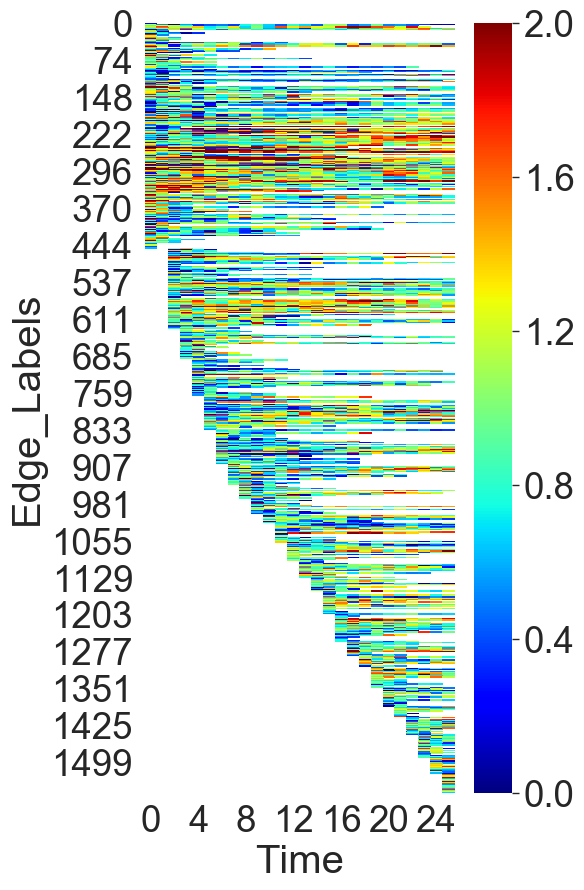

In [40]:
sns.set_context("paper", font_scale=3)  
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize = (5,10),sharey=True)
sns.heatmap(tension_table, ax=ax,
            vmin=0, vmax=2,cmap = 'jet')

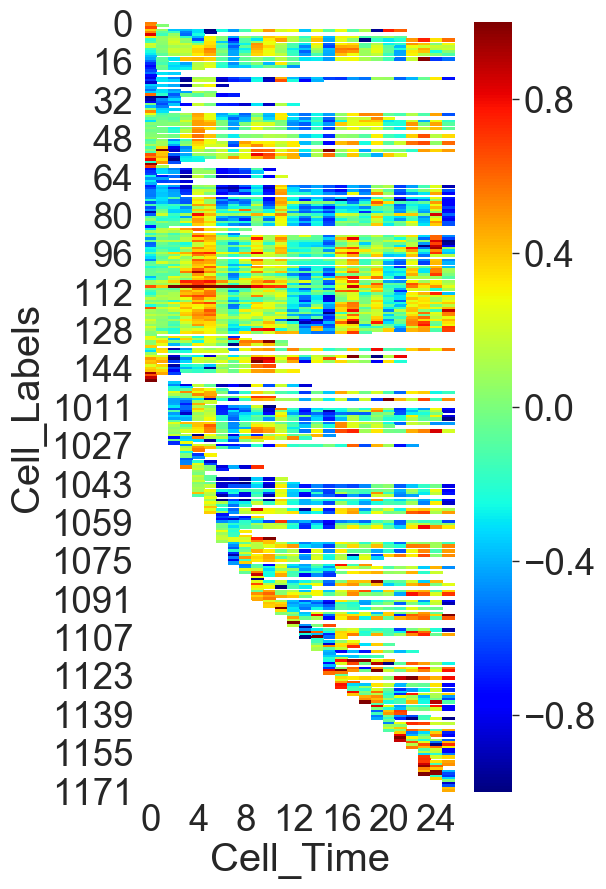

In [41]:
sns.set_context("paper", font_scale=3)  
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize = (5,10),sharey=True)
sns.heatmap(pressure_table, ax=ax,
            vmin=-1, vmax=1,cmap = 'jet')

## Colony colormaps

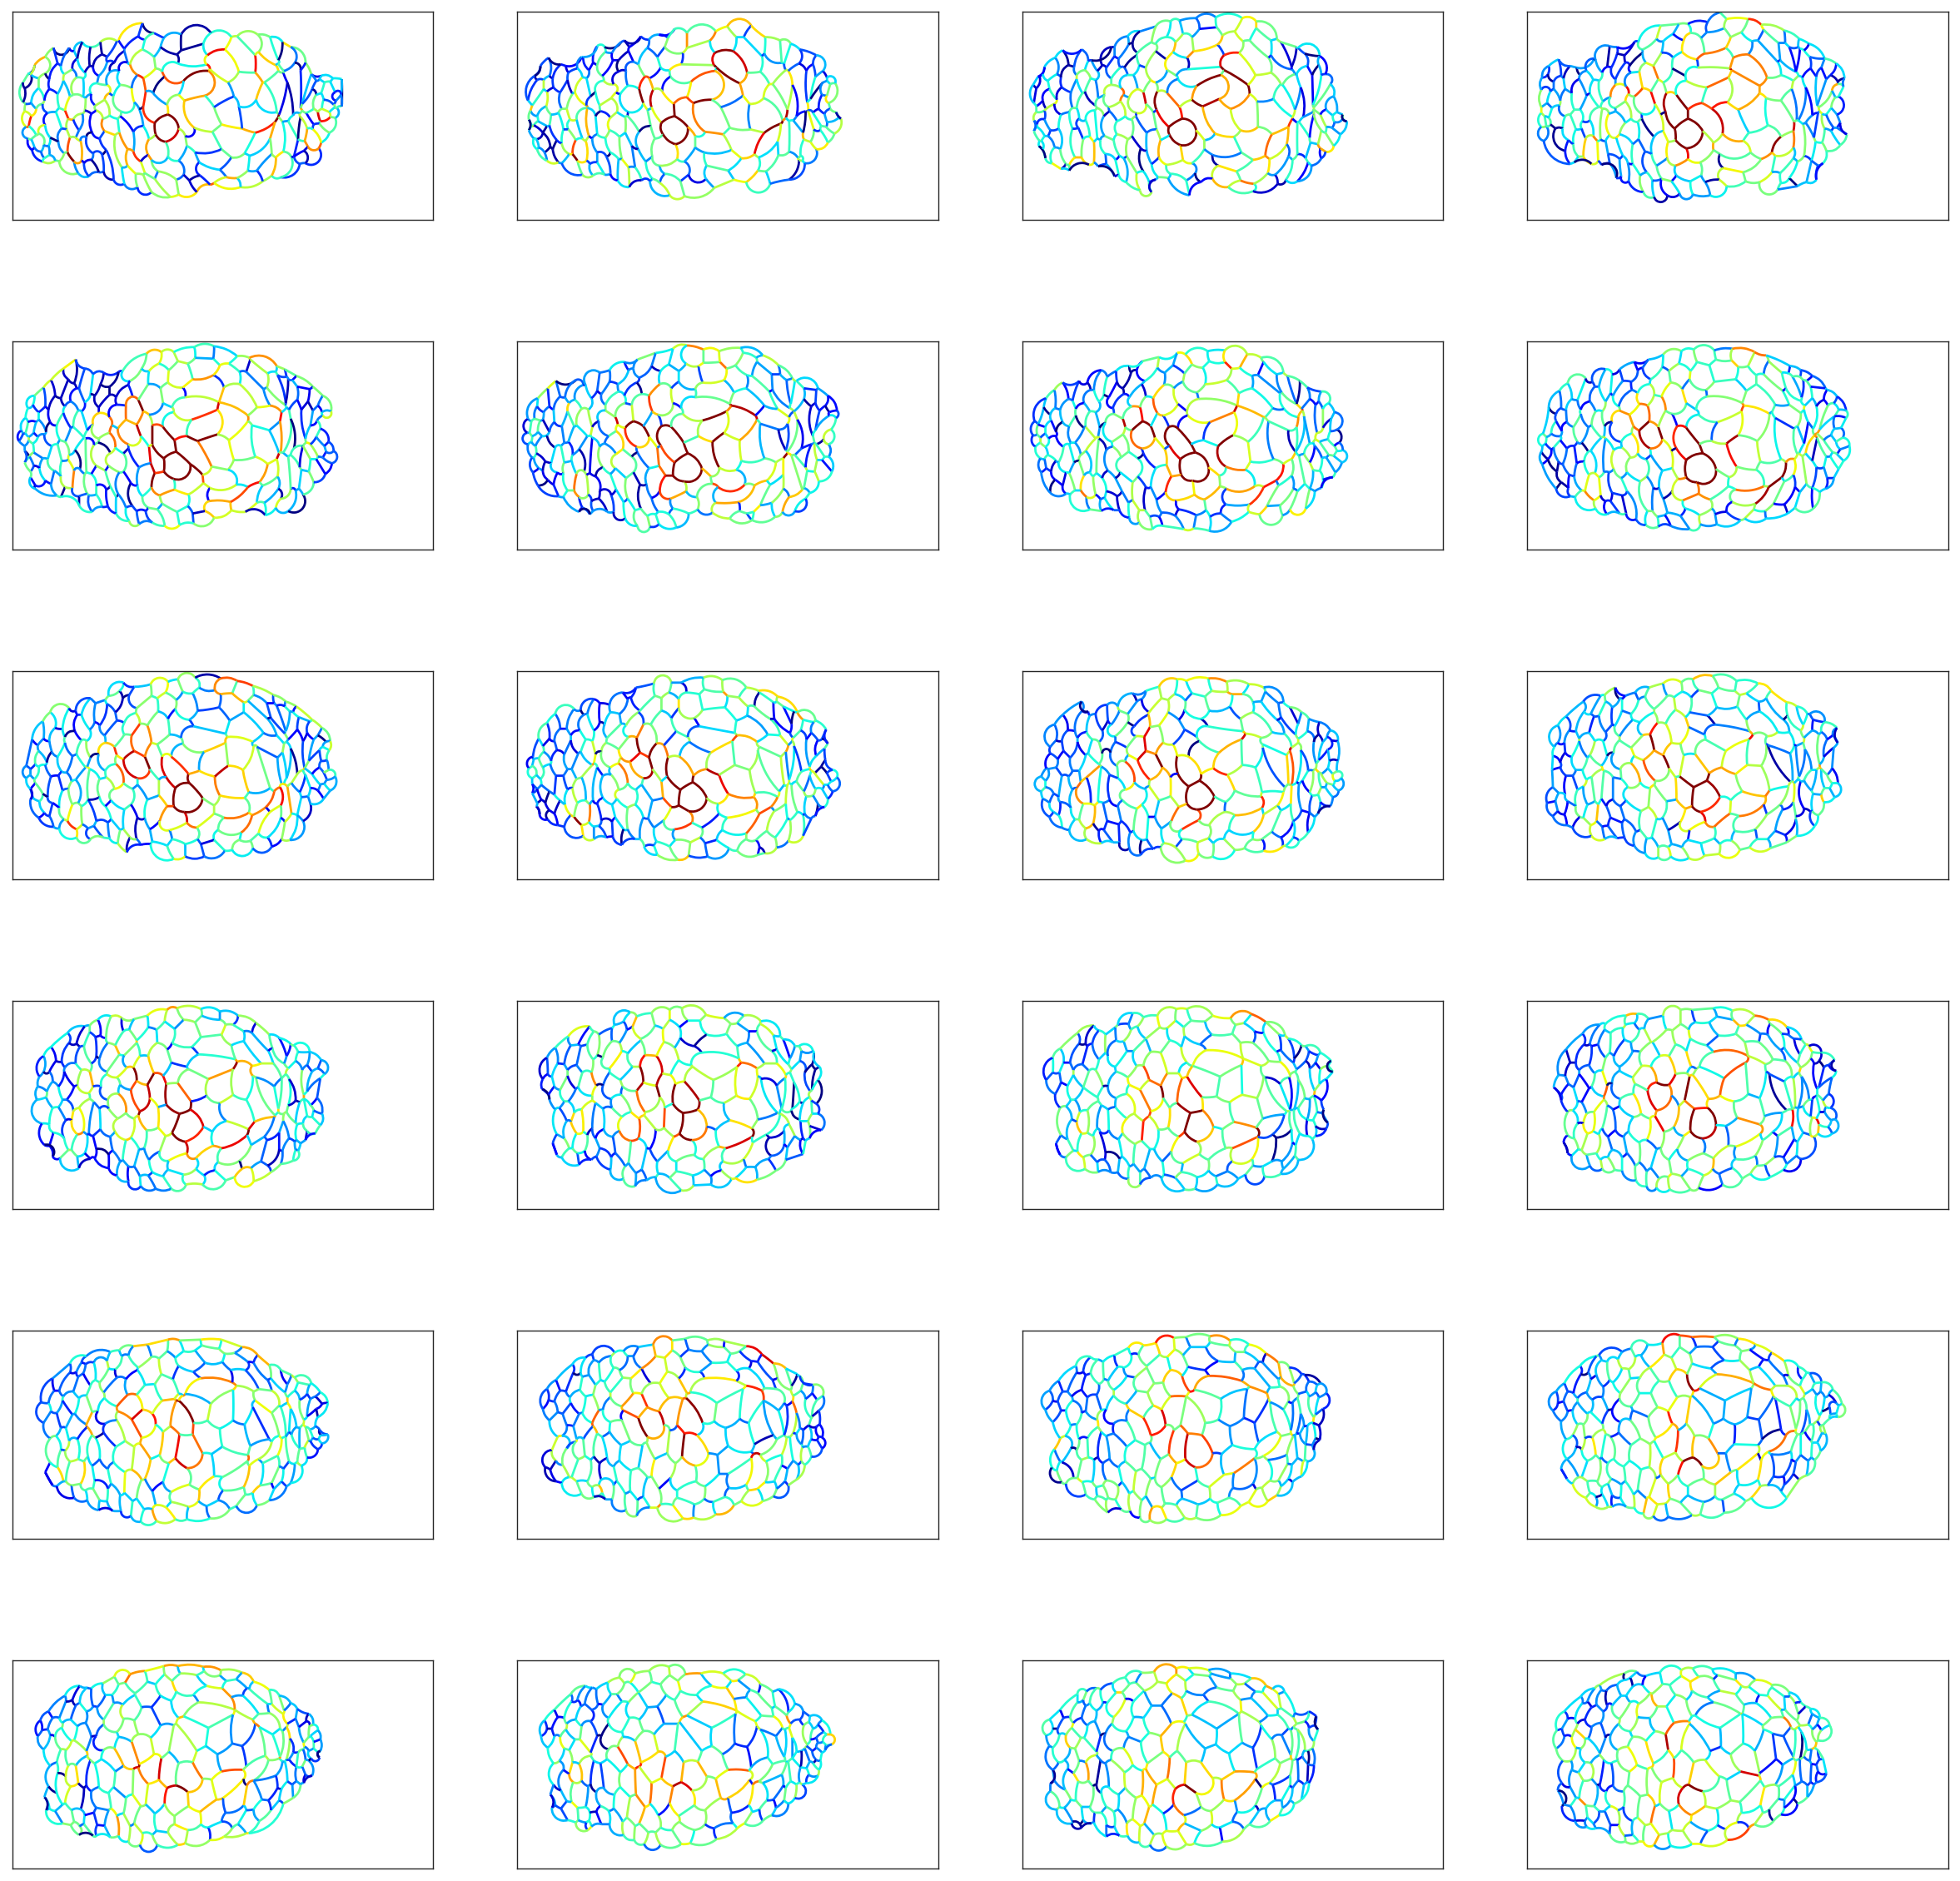

In [42]:
# Plot 
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 4
fig, axn = plt.subplots(6, total, figsize = (30,30),sharey=True)
nums=list(range(24))

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=0, max_x=511, min_y=253, max_y=0,
                      min_ten = 0, max_ten = 2.5, specify_color = 'jet',cbar = 'no', lw = 2)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [0,511], ylim = [253,0], aspect = 1)

# pylab.savefig('geometry.pdf', bbox_inches = 'tight')
# pylab.savefig('geometry.svg', bbox_inches = 'tight')

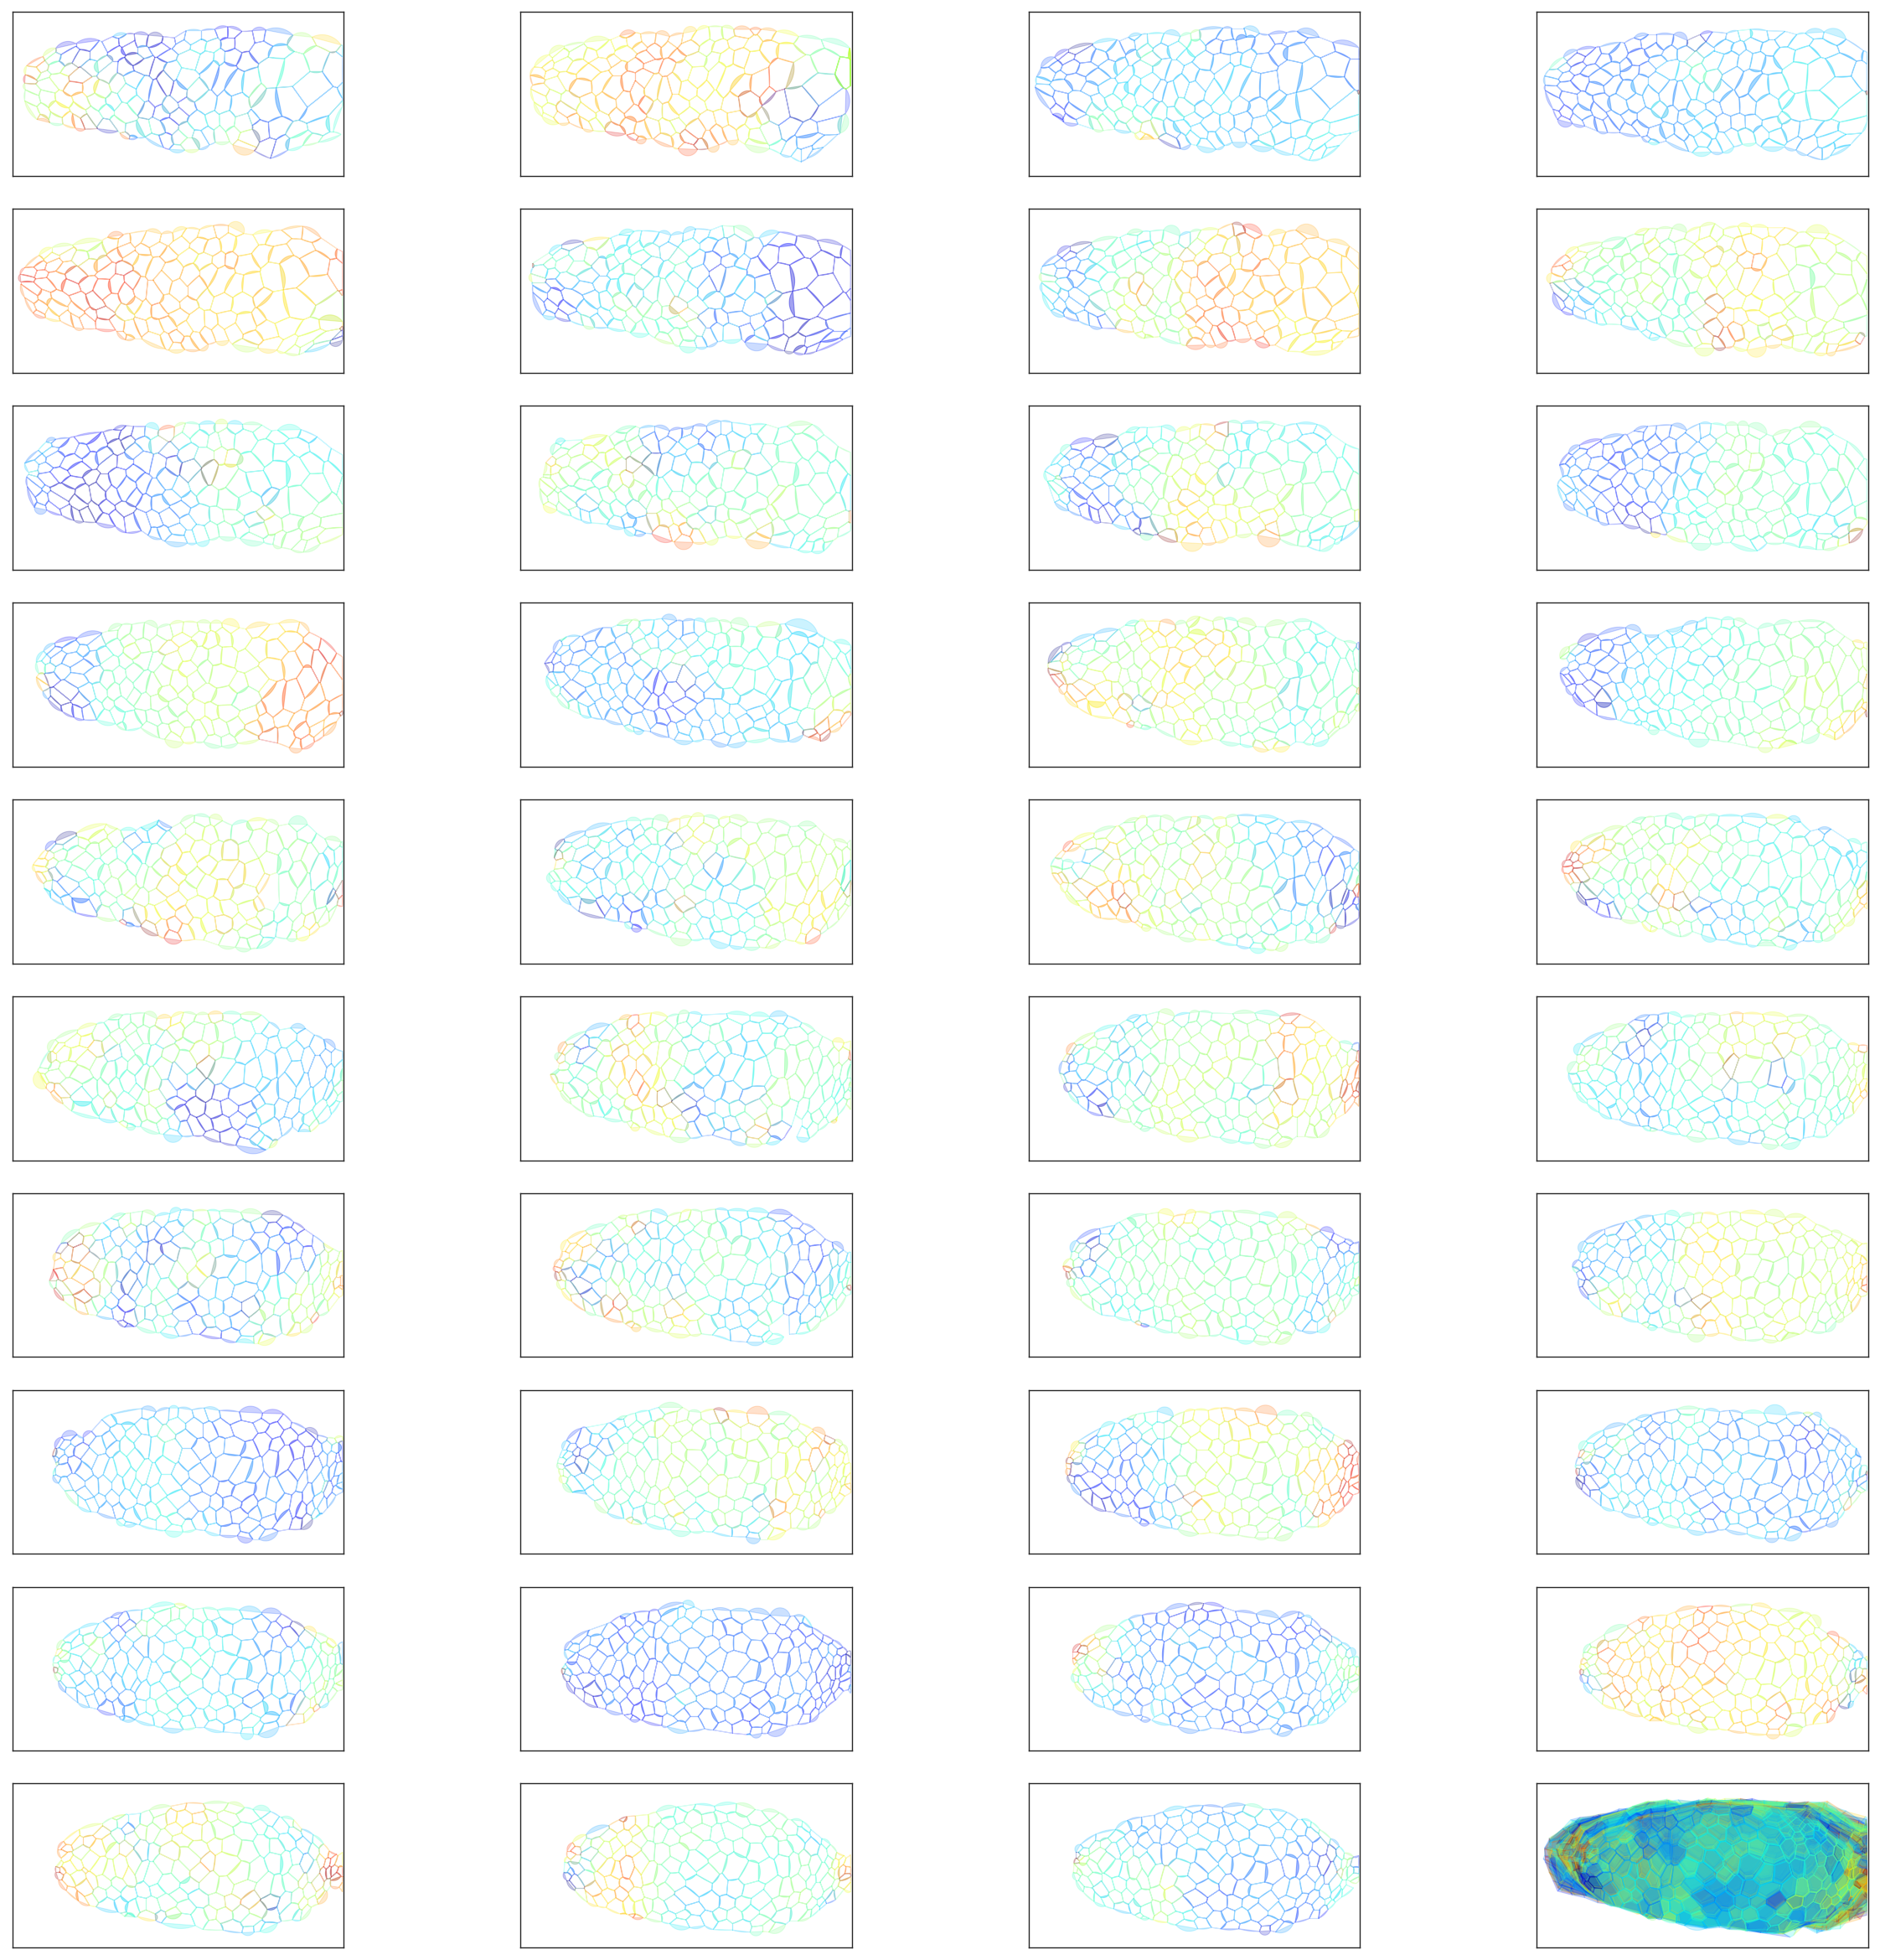

In [65]:
# Plot 
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 4
fig, axn = plt.subplots(10, total, figsize = (30,30),sharey=True)
nums=list(range(40))

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]
    
    pressures = [c.pressure for c in col.cells]
    #mean_pres = np.mean(pressures)
    #[e.plot(ax) for e in colonies[str(nums[i])].edges]
    #pressures = [e/mean_pres for e in pressures]
    
    #0.05719482679377424 -0.006372510819135761
    #0.03714305198366631 0.02524435363198312
    col.plot_pressures(ax, fig, pressures, min_x=0, max_x=511, min_y=253, max_y=0,
                      min_pres = None, max_pres = None ,specify_color = 'jet', cbar = 'no', lw = 2)
    plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=1))
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [0,511], ylim = [253,0], aspect = 1)

# pylab.savefig('geometry.pdf', bbox_inches = 'tight')
# pylab.savefig('geometry.svg', bbox_inches = 'tight')

## Tension movies

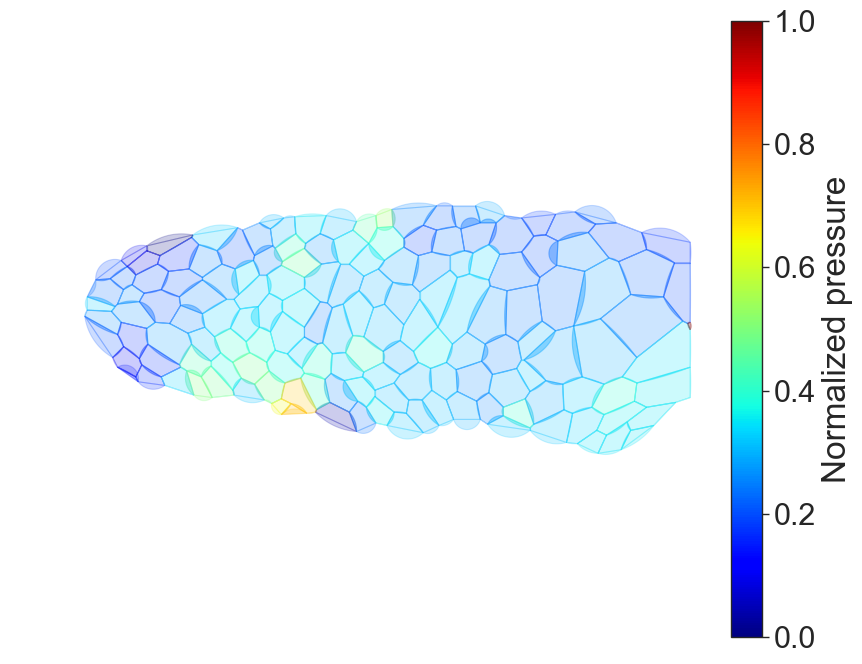

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
this_colony=colonies['4']
pressures = [cell.pressure for cell in this_colony.cells]
this_colony.plot_pressures(ax, 
                          fig, 
                          pressures, 
                          min_x=0, max_x=511, 
                          min_y=253, max_y=0, 
                          min_ten = None, max_ten = None, 
                          specify_color = 'jet', cbar = 'no', lw = 3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cl = plt.colorbar(sm, ax=ax)
cl.set_label('Normalized pressure')
ax.axis('off');

In [19]:
def plot_tensions( fig, ax, colonies, min_x=None, max_x=None, min_y=None, max_y=None, min_ten=None,
                      max_ten=None, specify_aspect=None, specify_color=None, type=None, **kwargs):
        """
        PLOTTING FUNCTION
        Make a tension movie (colormap) for all timepoints of the colony
        """
        all_tensions, _, _ = all_tensions_and_radius_and_pressures(colonies)
        if not min_ten and not max_ten:
            _, max_ten, min_ten = get_min_max_by_outliers_iqr(all_tensions)

        counter = 0
        for t, v in colonies.items():
            index = str(t)
            edges = colonies[index].tot_edges
            if type == 'Ground_truth':
                tensions = [e.ground_truth for e in edges]
            else:

                tensions = [e.tension for e in edges]
                mean_ten = np.mean(tensions)
                tensions = [i / mean_ten for i in tensions]
            colonies[index].plot_tensions(ax, fig, tensions, min_x, max_x, min_y, max_y,
                                          min_ten, max_ten, specify_color, **kwargs)
            plt.setp(ax.get_yticklabels(), visible=False)
            plt.setp(ax.get_xticklabels(), visible=False)
            if specify_aspect is not None:
                ax.set(xlim=[0, 600], ylim=[0, 600], aspect=1)

            pylab.savefig('_tmp%05d.png' % counter, dpi=200, bbox_inches='tight')
            counter += 1
            plt.cla()
            plt.clf()
            plt.close()
            fig, ax = plt.subplots(1, 1, figsize=(6, 4))

        fps = 1.5
        os.system("rm movie_tension.mp4")
        os.system("ffmpeg -r " + str(fps) + " -b 1800 -i _tmp%05d.png movie_tension.mp4")
        #os.system("rm _tmp*.png")

        plt.cla()
        plt.clf()
        plt.close()

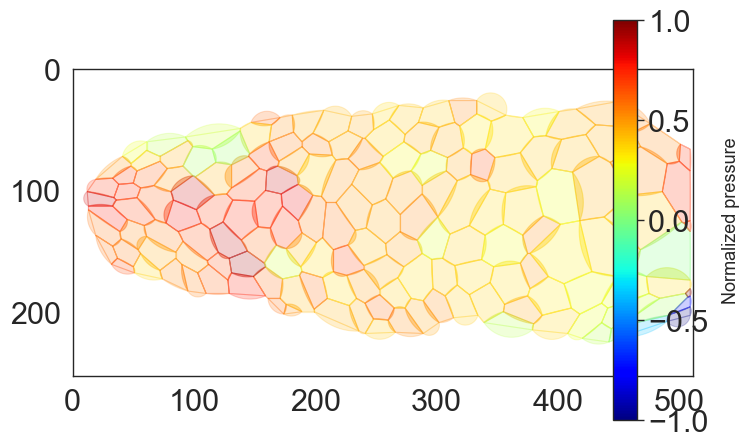

In [63]:
%matplotlib inline

# Asegúrate de que la instancia de Colony ya esté creada: colony_instance
colony_instance=colonies['4']
# Inicializar la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Obtener las presiones de las células en la instancia de colonia
pressures = [cell.pressure for cell in colony_instance.cells]

# Aplicar la función plot_pressures en la instancia de colonia
colony_instance.plot_pressures(
    ax=ax,
    fig=fig,
    pressures=pressures,
    min_x=0,
    max_x=511,
    min_y=253,
    max_y=0,
    min_pres=None,  # Opcional: establece un valor mínimo de presión para la normalización
    max_pres=None,  # Opcional: establece un valor máximo de presión para la normalización
    specify_color='bwr',  # Opcional: establece un mapa de colores diferente al predeterminado (viridis)
    cbar='no',  # Opcional: establece si se debe mostrar una barra de colores en el gráfico
)

# Mostrar la figura
plt.show()

KeyError: '42'

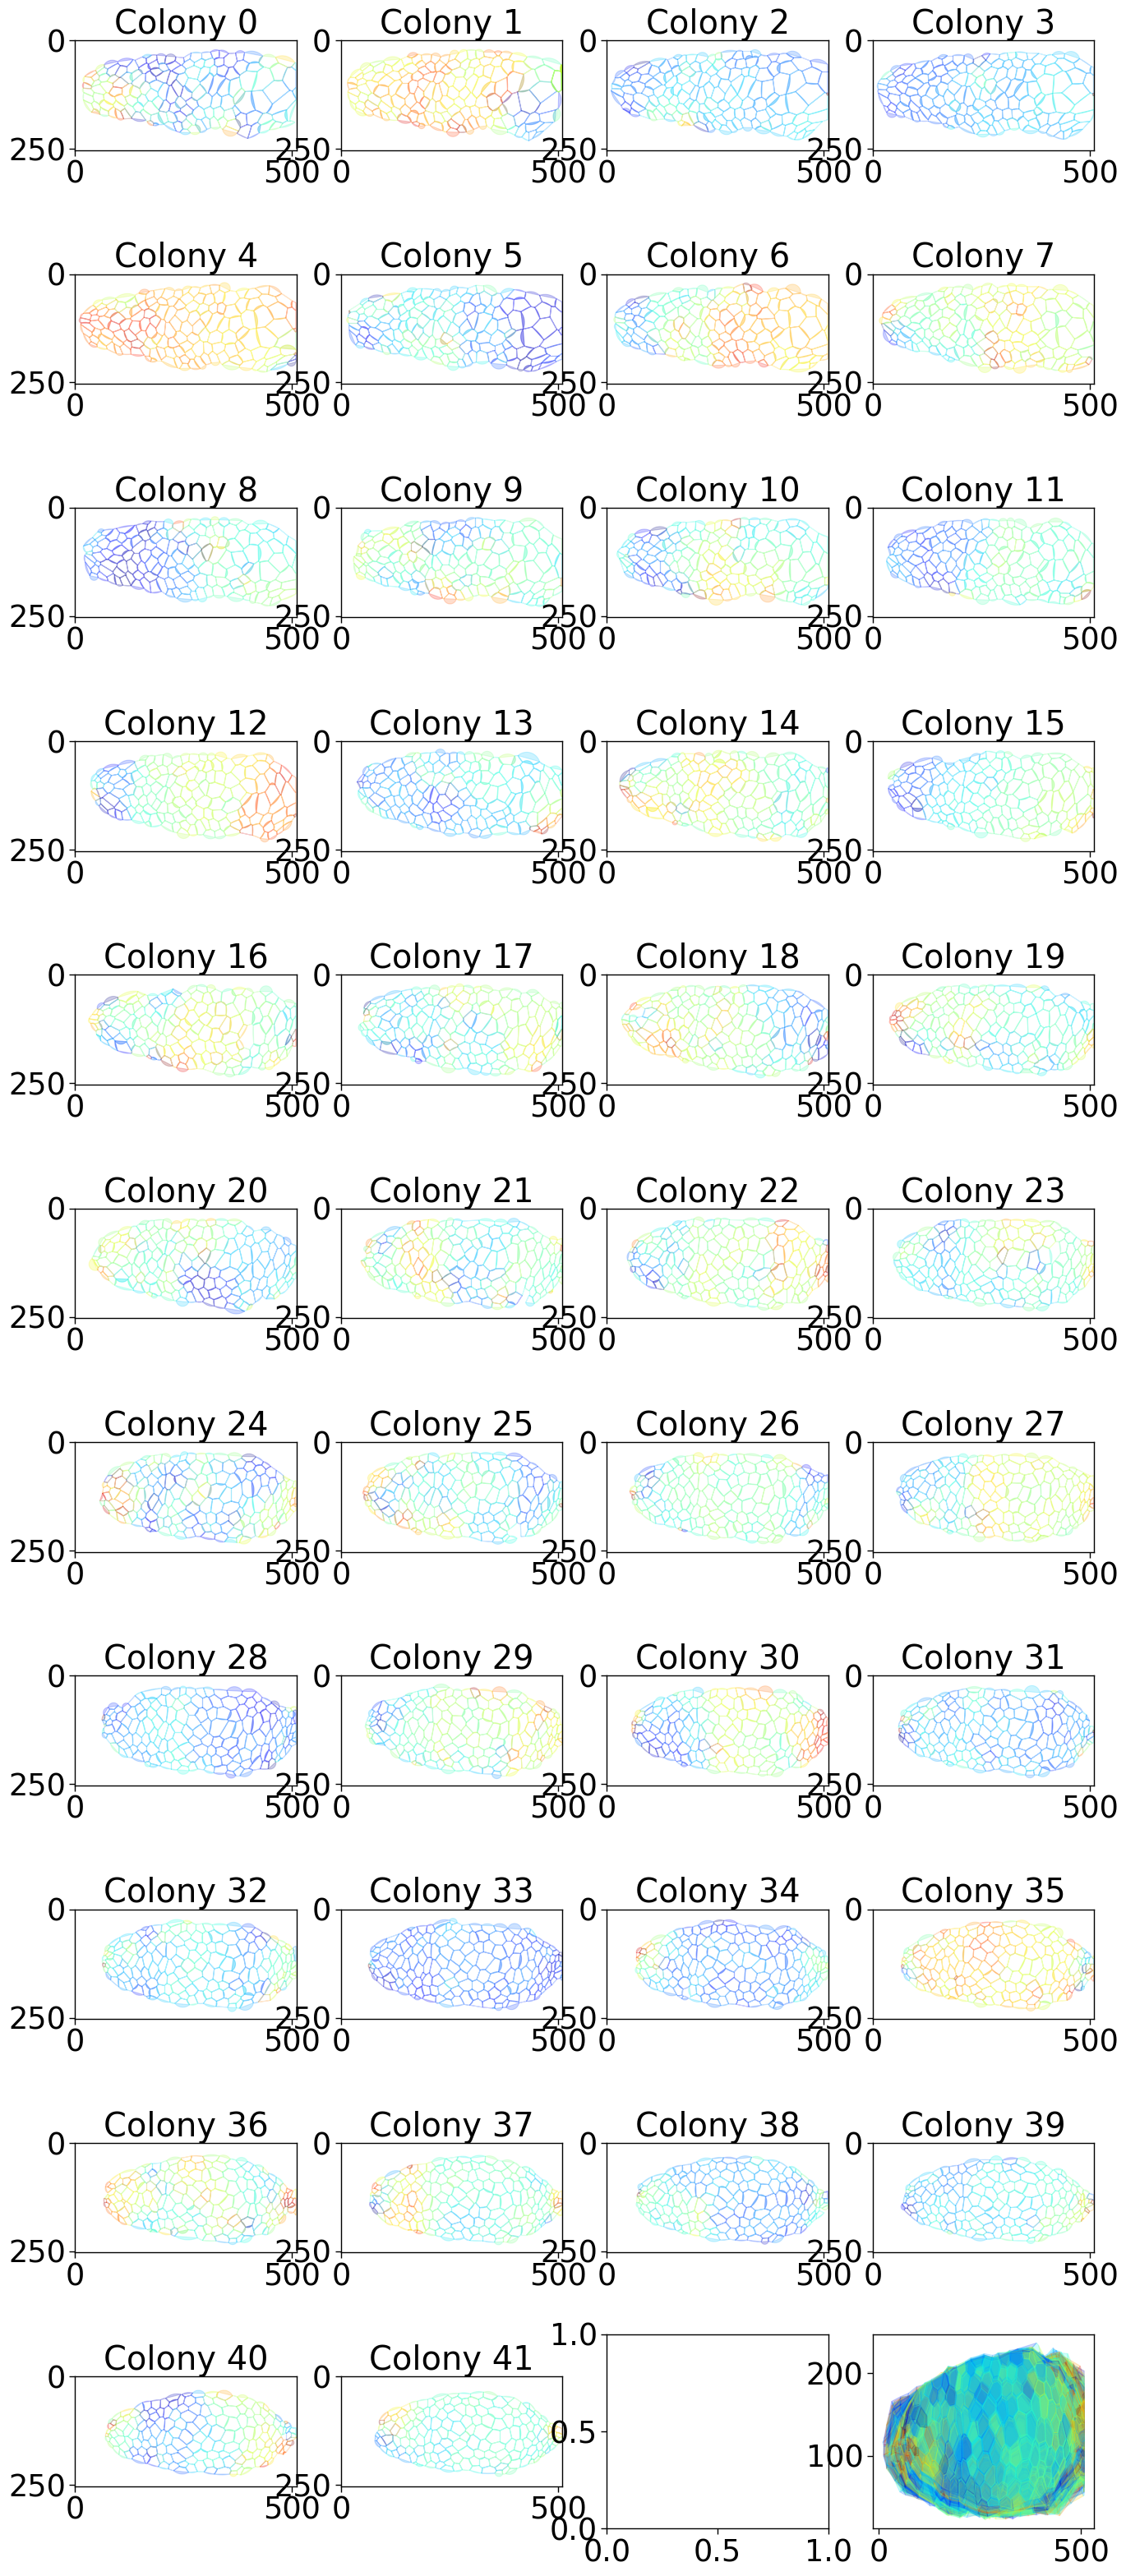

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

n_rows = 11
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 40))

for index in range(44):
    colony_instance = colonies[str(index)]

    row = index // n_cols
    col = index % n_cols

    ax = axes[row, col]

    pressures = [cell.pressure for cell in colony_instance.cells]

    colony_instance.plot_pressures(
        ax=ax,
        fig=fig,
        pressures=pressures,
        min_x=0,
        max_x=511,
        min_y=253,
        max_y=0,
        min_pres=None,
        max_pres=None,
        specify_color='jet',
        cbar='no',
    )

    ax.set_title(f'Colony {index}')

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [59]:
def all_tensions_and_radius_and_pressures(colonies):
    all_tensions = []
    all_radii = []
    all_pressures = []
    for t, v in colonies.items():
        index = str(t)
        cells = colonies[index].cells
        edges = colonies[index].tot_edges
        [all_tensions.append(e.tension) for e in edges if e.tension not in all_tensions]
        [all_radii.append(e.radius) for e in edges if e.radius not in all_radii]
        [all_pressures.append(c.pressure) for c in cells if c.pressure not in all_pressures]
    return all_tensions, all_radii, all_pressures

def get_min_max_by_outliers_iqr(ys, type=None):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    updated_list = np.where((ys > upper_bound) | (ys < lower_bound), np.inf, ys)
    max_t = max([e for e in updated_list if e != np.inf])
    min_t = min([e for e in updated_list if e != np.inf])
    if type == None:
        return updated_list, max_t, min_t
    else:
        std_t = np.std([e for e in updated_list if e != np.inf])
        mean_t = np.mean([e for e in updated_list if e != np.inf])
        return updated_list, mean_t + std_t, mean_t
    
def plot_tensions(fig, ax, colonies, min_x=None, max_x=None, min_y=None, max_y=None, min_ten=None,
                      max_ten=None, specify_aspect=None, specify_color=None, type=None, **kwargs):
        """
        PLOTTING FUNCTION
        Make a tension movie (colormap) for all timepoints of the colony
        """
        all_tensions, _, _ =all_tensions_and_radius_and_pressures(colonies)
        if not min_ten and not max_ten:
            _, max_ten, min_ten =get_min_max_by_outliers_iqr(all_tensions)

        counter = 0
        for t, v in colonies.items():
            index = str(t)
            edges = colonies[index].tot_edges
            if type == 'Ground_truth':
                tensions = [e.ground_truth for e in edges]
            else:

                tensions = [e.tension for e in edges]
                mean_ten = np.mean(tensions)
                tensions = [i / mean_ten for i in tensions]
            colonies[index].plot_tensions(ax, fig, tensions, min_x, max_x, min_y, max_y,
                                          min_ten, max_ten, specify_color, **kwargs)
            plt.setp(ax.get_yticklabels(), visible=False)
            plt.setp(ax.get_xticklabels(), visible=False)
            if specify_aspect is not None:
                ax.set(xlim=[0, 511], ylim=[253, 0], aspect=1)

            pylab.savefig('_tens%05d.png' % counter, dpi=200, bbox_inches='tight')
            counter += 1
            plt.cla()
            plt.clf()
            plt.close()
            fig, ax = plt.subplots(1, 1, figsize=(6, 4))

        fps = 1.5
        os.system("rm movie_tension.mp4")
        os.system("ffmpeg -r " + str(fps) + " -b 1800 -i _tmp%05d.png movie_tension.mp4")
        #os.system("rm _tmp*.png")

        plt.cla()
        plt.clf()
        plt.close()
        
def plot_pressures(fig, ax, colonies, specify_aspect=None, specify_color=None, **kwargs):
    _, _, all_pressures = all_tensions_and_radius_and_pressures(colonies)
    _, max_pres, min_pres = get_min_max_by_outliers_iqr(all_pressures)#, type='pressure')
    print(max_pres, min_pres)
    counter = 0
    for t, v in colonies.items():
        index = str(t)
        cells = colonies[index].cells
        pressures = [e.pressure for e in cells]
        
        colonies[index].plot_pressures(
        ax=ax,
        fig=fig,
        pressures=pressures,
        min_x=0,
        max_x=511,
        min_y=253,
        max_y=0,
        min_pres=min_pres,
        max_pres=max_pres,
        specify_color='jet',
        cbar='no',
    )
        
        
        [e.plot(ax) for e in colonies[index].edges]
        
        
        if specify_aspect is not None:
            ax.set(xlim=[0, 511], ylim=[253, 0], aspect=1)
        pylab.savefig('_pres%05d.png' % counter, dpi=200)
        counter += 1
        plt.cla()
        plt.clf()
        plt.close()
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    fps = 1
    os.system("rm movie_pressure.mp4")
    os.system("ffmpeg -r " + str(fps) + " -b 1800 -i _tmp%05d.png movie_pressure.mp4")
    #os.system("rm _tmp*.png")

    plt.cla()
    plt.clf()
    plt.close()
    
def plot_both_tension_pressure(fig, ax, colonies, specify_aspect=None, specify_color=None, **kwargs):
        """
        PLOTTING FUNCTION
        Make a combined tension + pressure movie over colonies
        """
        all_tensions, all_radii, all_pressures = all_tensions_and_radius_and_pressures(colonies)
        _, max_ten, min_ten = get_min_max_by_outliers_iqr(all_tensions)
        _, max_rad, min_rad = get_min_max_by_outliers_iqr(all_radii)
        _, max_pres, min_pres = get_min_max_by_outliers_iqr(all_pressures, type='pressure')

        counter = 0
        for t, v in colonies.items():
            index = str(t)
            cells = colonies[index].cells
            pressures = [e.pressure for e in cells]
            edges = colonies[index].tot_edges
            tensions = [e.tension for e in edges]
            colonies[index].plot(ax, fig, tensions, pressures, min_ten, max_ten,
                                 min_pres, max_pres, specify_color, **kwargs)
            if specify_aspect is not None:
                ax.set(xlim=[0, 511], ylim=[253, 0], aspect=1)

            pylab.savefig('_both%05d.png' % counter, dpi=200)
            counter += 1
            plt.cla()
            plt.clf()
            plt.close()
            fig, ax = plt.subplots(1, 1, figsize=(8, 5))

        fps = 5
        os.system("rm movie_ten_pres.mp4")
        os.system("ffmpeg -r " + str(fps) + " -b 1800 -i _tmp%05d.png movie_ten_pres.mp4")
        #os.system("rm _tmp*.png")

        plt.cla()
        plt.clf()
        plt.close()

In [41]:
all_tensions, _, all_pressures = all_tensions_and_radius_and_pressures(colonies)
_, max_pres, min_pres = get_min_max_by_outliers_iqr(all_pressures, type='pressure')
_, max_tens, min_tens = get_min_max_by_outliers_iqr(all_tensions, type='tensions')
#print(all_pressures)
print(max_pres, min_pres)
print(max_tens, min_tens)

0.03714305198366631 0.02524435363198312
0.29901078019876204 0.2149452421106992


In [60]:
os.chdir(r'C:\Users\Ander\Documents\TFM\RESULTADOS\ZASP')

# Crea un objeto Figure y un objeto Axes de matplotlib
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Llama a la función plot_pressures para crear la animación
plot_both_tension_pressure(fig, ax, colonies, specify_aspect=1, specify_color="jet")  # Puedes cambiar "jet" por el mapa de colores que prefieras

plot_tensions(fig, ax, colonies, specify_aspect=1, specify_color="jet")  # Puedes cambiar "jet" por el mapa de colores que prefieras

plot_pressures(fig, ax, colonies, specify_aspect=1, specify_color="jet")  # Puedes cambiar "jet" por el mapa de colores que prefieras


0.05719482679377424 -0.006372510819135761
